#**Online Sales data analysis**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
from numpy.lib.npyio import DataSource
from sklearn.preprocessing import MinMaxScaler
import random
import datetime

#**Creating Synthetic data**

In [ ]:
pip install faker

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 9.4 MB/s eta 0:00:00


In [ ]:
from faker import Faker

In [ ]:
np.random.seed(43)

num_orders=1500

order_id=['ORD' + str(np.random.randint(1000, 9999)) for i in range(1, num_orders + 1)]

unique_product_ids = [f'PROD{np.random.randint(1000, 5000)}' for _ in range(num_orders)]
product_id = [np.random.choice(unique_product_ids) for i in range(num_orders)]

unique_customer_ids = [f'CUST{np.random.randint(1000, 9000)}' for _ in range(num_orders)]
customer_id = [np.random.choice(unique_customer_ids) for i in range(num_orders)]

null_percentage_d = 0.06
num_nulls_d = int(num_orders * null_percentage_d)
null_indices_d = np.random.choice(range(num_orders), size=num_nulls_d, replace=False)

start_date = pd.to_datetime('2022-01-01')
end_date = pd.to_datetime('2023-01-01')
order_dates = [np.nan if i in null_indices_d else pd.to_datetime(np.random.choice(pd.date_range(start_date, end_date))).strftime('%Y-%m-%d %H:%M:%S') for i in range(num_orders)]

null_percentage_pn = 0.06
num_nulls_pn = int(num_orders * null_percentage_pn)
null_indices_pn = np.random.choice(range(num_orders), size=num_nulls_pn, replace=False)

sample_product_names = ['Laptop', 'Smartphone', 'Headphones', 'Camera', 'Tablet', 'Printer', 'Monitor', 'Keyboard', 'Mouse', 'Electronics', 'Pendrive', 'Computer', 'Dresses', 'Books', 'Groceries', 'Washing Meachine', 'Television', 'Microoven', 'Grinder']
product_names = [np.nan if i in null_indices_pn else np.random.choice(sample_product_names) for i in range(num_orders)]

null_percentage_pr = 0.05
num_nulls_pr = int(num_orders * null_percentage_pr)
null_indices_pr = np.random.choice(range(num_orders), size=num_nulls_pr, replace=False)

prices = [np.nan if i in null_indices_pr else np.random.uniform(5000.0, 100000.0) for i in range(num_orders)]

null_percentage_q = 0.04
num_nulls_q = int(num_orders * null_percentage_q)
null_indices_q = np.random.choice(range(num_orders), size=num_nulls_q, replace=False)

quantities = [np.nan if i in null_indices_q else np.random.randint(1, 10) for i in range(num_orders)]

total_sales = [0 if np.isnan(prices[i]) or np.isnan(quantities[i]) else int(round(prices[i] * quantities[i])) for i in range(num_orders)]

null_percentage_dis = 0.06
num_nulls_dis = int(num_orders * null_percentage_dis)
null_indices_dis = np.random.choice(range(num_orders), size=num_nulls_dis, replace=False)

discounts = [np.nan if i in null_indices_dis else np.random.uniform(0.0, 50.0) for i in range(num_orders)]

fake = Faker()

shipping_addresses = [fake.address() for _ in range(num_orders)]

null_percentage_pm = 0.04
num_nulls_pm = int(num_orders * null_percentage_pm)
null_indices_pm = np.random.choice(range(num_orders), size=num_nulls_pm, replace=False)

payment_methods = [np.nan if i in null_indices_pm else np.random.choice(['Credit Card', 'PayPal', 'Cash On Delivery', 'Bank Transfer']) for i in range(num_orders)]

delivery_status = [np.random.choice([0, 1]) for i in range(num_orders)]

customer_ratings = [np.random.randint(0, 6) for i in range(num_orders)]

data={
    'Order ID': order_id,
    'Order Date': order_dates,
    'Product ID': product_id,
    'Product Name': product_names,
    'Price': prices,
    'Quantity': quantities,
    'Total Sales': total_sales,
    'Discount': discounts,
    'Customer ID': customer_id,
    'Shipping Address': shipping_addresses,
    'Payment Method': payment_methods,
    'Delivery Status': delivery_status,
    'Customer Rating': customer_ratings
}
print(data)
sales_df = pd.DataFrame(data)

{'Order ID': ['ORD4392', 'ORD3303', 'ORD8985', 'ORD3064', 'ORD9499', 'ORD9849', 'ORD6307', 'ORD6534', 'ORD7999', 'ORD1379', 'ORD1706', 'ORD1132', 'ORD7948', 'ORD8884', 'ORD6884', 'ORD9224', 'ORD5810', 'ORD9508', 'ORD5976', 'ORD3121', 'ORD5020', 'ORD9132', 'ORD6496', 'ORD9327', 'ORD5925', 'ORD9276', 'ORD1181', 'ORD2952', 'ORD3539', 'ORD5592', 'ORD5214', 'ORD9885', 'ORD6653', 'ORD1232', 'ORD9010', 'ORD4867', 'ORD3746', 'ORD9822', 'ORD8074', 'ORD4178', 'ORD1052', 'ORD2170', 'ORD1791', 'ORD3435', 'ORD4963', 'ORD7936', 'ORD6427', 'ORD2286', 'ORD2405', 'ORD6412', 'ORD7670', 'ORD2109', 'ORD6619', 'ORD8208', 'ORD3942', 'ORD3261', 'ORD8963', 'ORD4882', 'ORD3609', 'ORD9848', 'ORD9464', 'ORD2132', 'ORD9767', 'ORD4453', 'ORD7556', 'ORD8611', 'ORD7643', 'ORD2953', 'ORD6896', 'ORD3752', 'ORD8987', 'ORD8753', 'ORD9556', 'ORD3303', 'ORD4865', 'ORD5820', 'ORD6400', 'ORD5260', 'ORD5699', 'ORD3006', 'ORD1791', 'ORD8592', 'ORD7616', 'ORD6857', 'ORD4272', 'ORD1457', 'ORD8611', 'ORD1687', 'ORD5293', 'ORD960

# **Synthetic data**

In [ ]:
sales_df

,Order ID,Order Date,Product ID,Product Name,Price,Quantity,Total Sales,Discount,Customer ID,Shipping Address,Payment Method,Delivery Status,Customer Rating
0,ORD4392,2022-11-27 00:00:00,PROD3954,Monitor,83794.789276,7.0,586564,7.869280,CUST7859,"68642 Kevin Garden Suite 041\nStephanieside, W...",PayPal,0,4
1,ORD3303,2022-05-03 00:00:00,PROD3779,Monitor,52881.038251,7.0,370167,0.557919,CUST4586,"58881 Amanda Rest\nGloriahaven, AK 24547",Cash On Delivery,0,4
2,ORD8985,2022-01-26 00:00:00,PROD1098,Pendrive,19816.593802,5.0,99083,27.774141,CUST4561,"238 Shannon Spring Suite 090\nMcguirestad, NC ...",Credit Card,1,2
3,ORD3064,2022-09-14 00:00:00,PROD3494,Camera,38789.473624,1.0,38789,3.234149,CUST8217,USNV Armstrong\nFPO AE 97656,NaN,0,3
4,ORD9499,2022-05-21 00:00:00,PROD4999,Dresses,41759.827723,3.0,125279,35.961152,CUST2254,"697 Jerry Unions Suite 667\nNew Catherine, PA ...",PayPal,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,ORD8867,2022-07-14 00:00:00,PROD2728,Grinder,16644.325069,5.0,83222,49.292606,CUST7006,"616 Mccormick Court\nNew Jeanettemouth, AZ 09902",Cash On Delivery,0,4
1496,ORD9950,2022-08-06 00:00:00,PROD3462,Laptop,72167.527801,9.0,649508,39.860998,CUST1333,"2497 Elizabeth Ridge\nJohnstonborough, OK 07708",Credit Card,1,3
1497,ORD2664,2022-08-04 00:00:00,PROD1219,Washing Meachine,70958.396102,3.0,212875,41.536842,CUST3660,"548 Bryant Grove Suite 522\nAnthonybury, MO 91055",Bank Transfer,0,0
1498,ORD4784,2022-07-23 00:00:00,PROD1715,Tablet,88452.696827,7.0,619169,1.612805,CUST1255,402 Martinez Fall Suite 486\nRichardsonborough...,PayPal,1,2


In [ ]:
sales_df.dtypes

Order ID             object
Order Date           object
Product ID           object
Product Name         object
Price               float64
Quantity            float64
Total Sales           int64
Discount            float64
Customer ID          object
Shipping Address     object
Payment Method       object
Delivery Status       int64
Customer Rating       int64
dtype: object

In [ ]:
sales_df.head()

,Order ID,Order Date,Product ID,Product Name,Price,Quantity,Total Sales,Discount,Customer ID,Shipping Address,Payment Method,Delivery Status,Customer Rating
0,ORD4392,2022-11-27 00:00:00,PROD3954,Monitor,83794.789276,7.0,586564,7.869280,CUST7859,"6611 Kathleen Vista\nNew Trevorville, PA 90839",PayPal,0,4
1,ORD3303,2022-05-03 00:00:00,PROD3779,Monitor,52881.038251,7.0,370167,0.557919,CUST4586,Unit 5743 Box 5125\nDPO AA 39129,Cash On Delivery,0,4
2,ORD8985,2022-01-26 00:00:00,PROD1098,Pendrive,19816.593802,5.0,99083,27.774141,CUST4561,"534 Michael Light Suite 908\nWest Jessicatown,...",Credit Card,1,2
3,ORD3064,2022-09-14 00:00:00,PROD3494,Camera,38789.473624,1.0,38789,3.234149,CUST8217,"3133 Phillips Fort Apt. 256\nJohntown, OR 04139",NaN,0,3
4,ORD9499,2022-05-21 00:00:00,PROD4999,Dresses,41759.827723,3.0,125279,35.961152,CUST2254,690 Rodriguez Springs Apt. 528\nSouth Kevinbur...,PayPal,0,1


#**Statistical Information:**

In [ ]:
sales_df.shape

(1500, 13)

In [ ]:
sales_df.describe()

,Price,Quantity,Total Sales,Discount,Delivery Status,Customer Rating
count,1425.000000,1440.000000,1500.000000,1410.000000,1500.000000,1500.000000
mean,51616.854640,4.991667,235134.039333,25.689138,0.482667,2.468000
std,27486.617364,2.569114,208788.295917,14.337404,0.499866,1.701442
min,5054.614827,1.000000,0.000000,0.087474,0.000000,0.000000
25%,28261.515637,3.000000,66897.500000,13.558377,0.000000,1.000000
50%,51011.151910,5.000000,177748.000000,26.278095,0.000000,2.000000
75%,74293.726621,7.000000,364694.750000,38.248093,1.000000,4.000000
max,99950.533087,9.000000,899555.000000,49.990952,1.000000,5.000000


In [ ]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order ID          1500 non-null   object 
 1   Order Date        1410 non-null   object 
 2   Product ID        1500 non-null   object 
 3   Product Name      1410 non-null   object 
 4   Price             1425 non-null   float64
 5   Quantity          1440 non-null   float64
 6   Total Sales       1500 non-null   int64  
 7   Discount          1410 non-null   float64
 8   Customer ID       1500 non-null   object 
 9   Shipping Address  1500 non-null   object 
 10  Payment Method    1440 non-null   object 
 11  Delivery Status   1500 non-null   int64  
 12  Customer Rating   1500 non-null   int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 152.5+ KB


In [ ]:
numerical_columns = sales_df.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = sales_df.select_dtypes(include=['object']).columns

print("Numerical Columns:")
print(numerical_columns)

print("\nCategorical Columns:")
print(categorical_columns)

Numerical Columns:
Index(['Price', 'Quantity', 'Total Sales', 'Discount', 'Delivery Status',
       'Customer Rating'],
      dtype='object')

Categorical Columns:
Index(['Order ID', 'Order Date', 'Product ID', 'Product Name', 'Customer ID',
       'Shipping Address', 'Payment Method'],
      dtype='object')


#**Data Pre-Processing**

#counting Missing Value

In [ ]:
null_counts = sales_df.isnull().sum()

print("\nCount of null values for each column:")
print(null_counts)


Count of null values for each column:
Order ID             0
Order Date          90
Product ID           0
Product Name        90
Price               75
Quantity            60
Total Sales          0
Discount            90
Customer ID          0
Shipping Address     0
Payment Method      60
Delivery Status      0
Customer Rating      0
dtype: int64


In [ ]:
csv_file_path = 'sales_data.csv'
sales_df.to_csv(csv_file_path, index=False)
print(f"DataFrame has been successfully converted to CSV: {csv_file_path}")

DataFrame has been successfully converted to CSV: sales_data.csv


#**Data Quality**

#**Imputation of null vlaues**

#Bar graph for null values

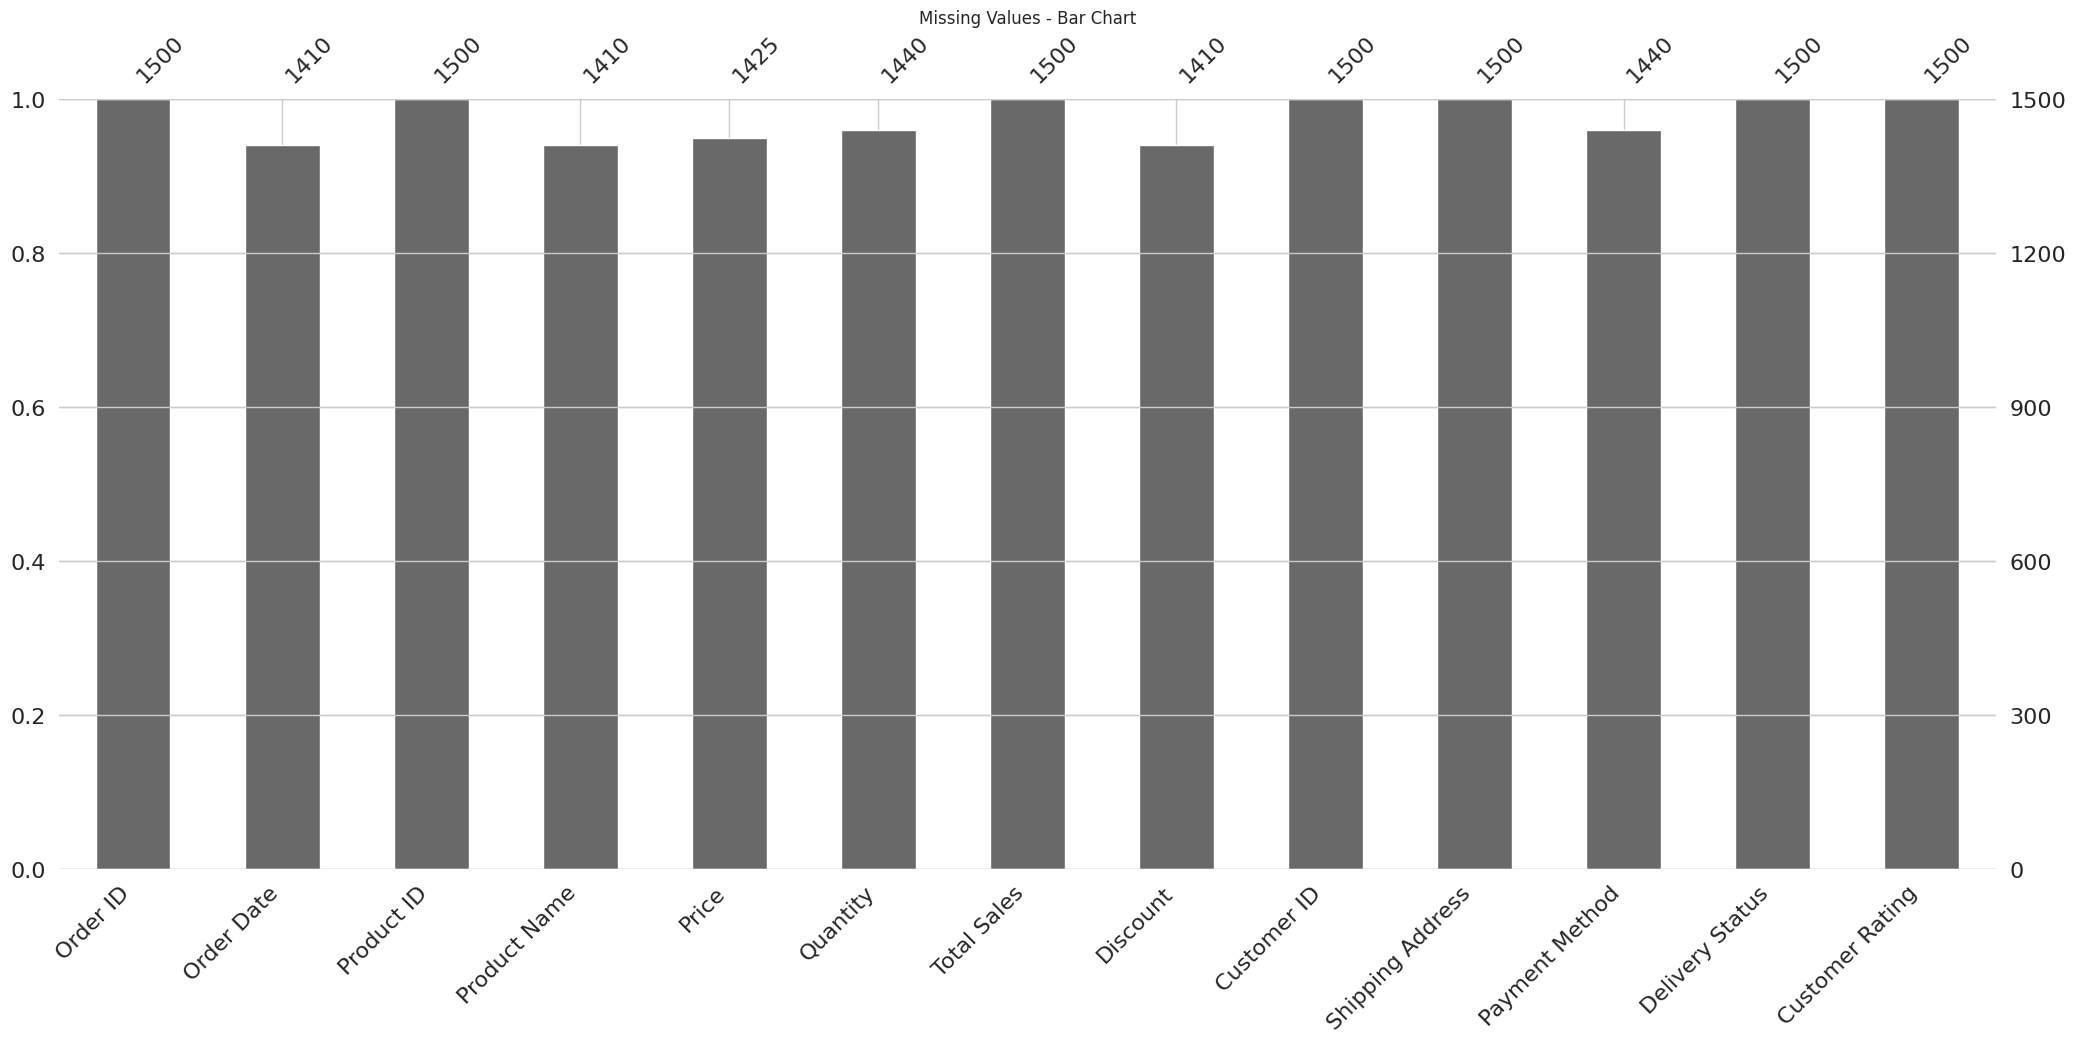

In [ ]:
msno.bar(sales_df)
plt.title("Missing Values - Bar Chart")
plt.show()

#Matrix for null values

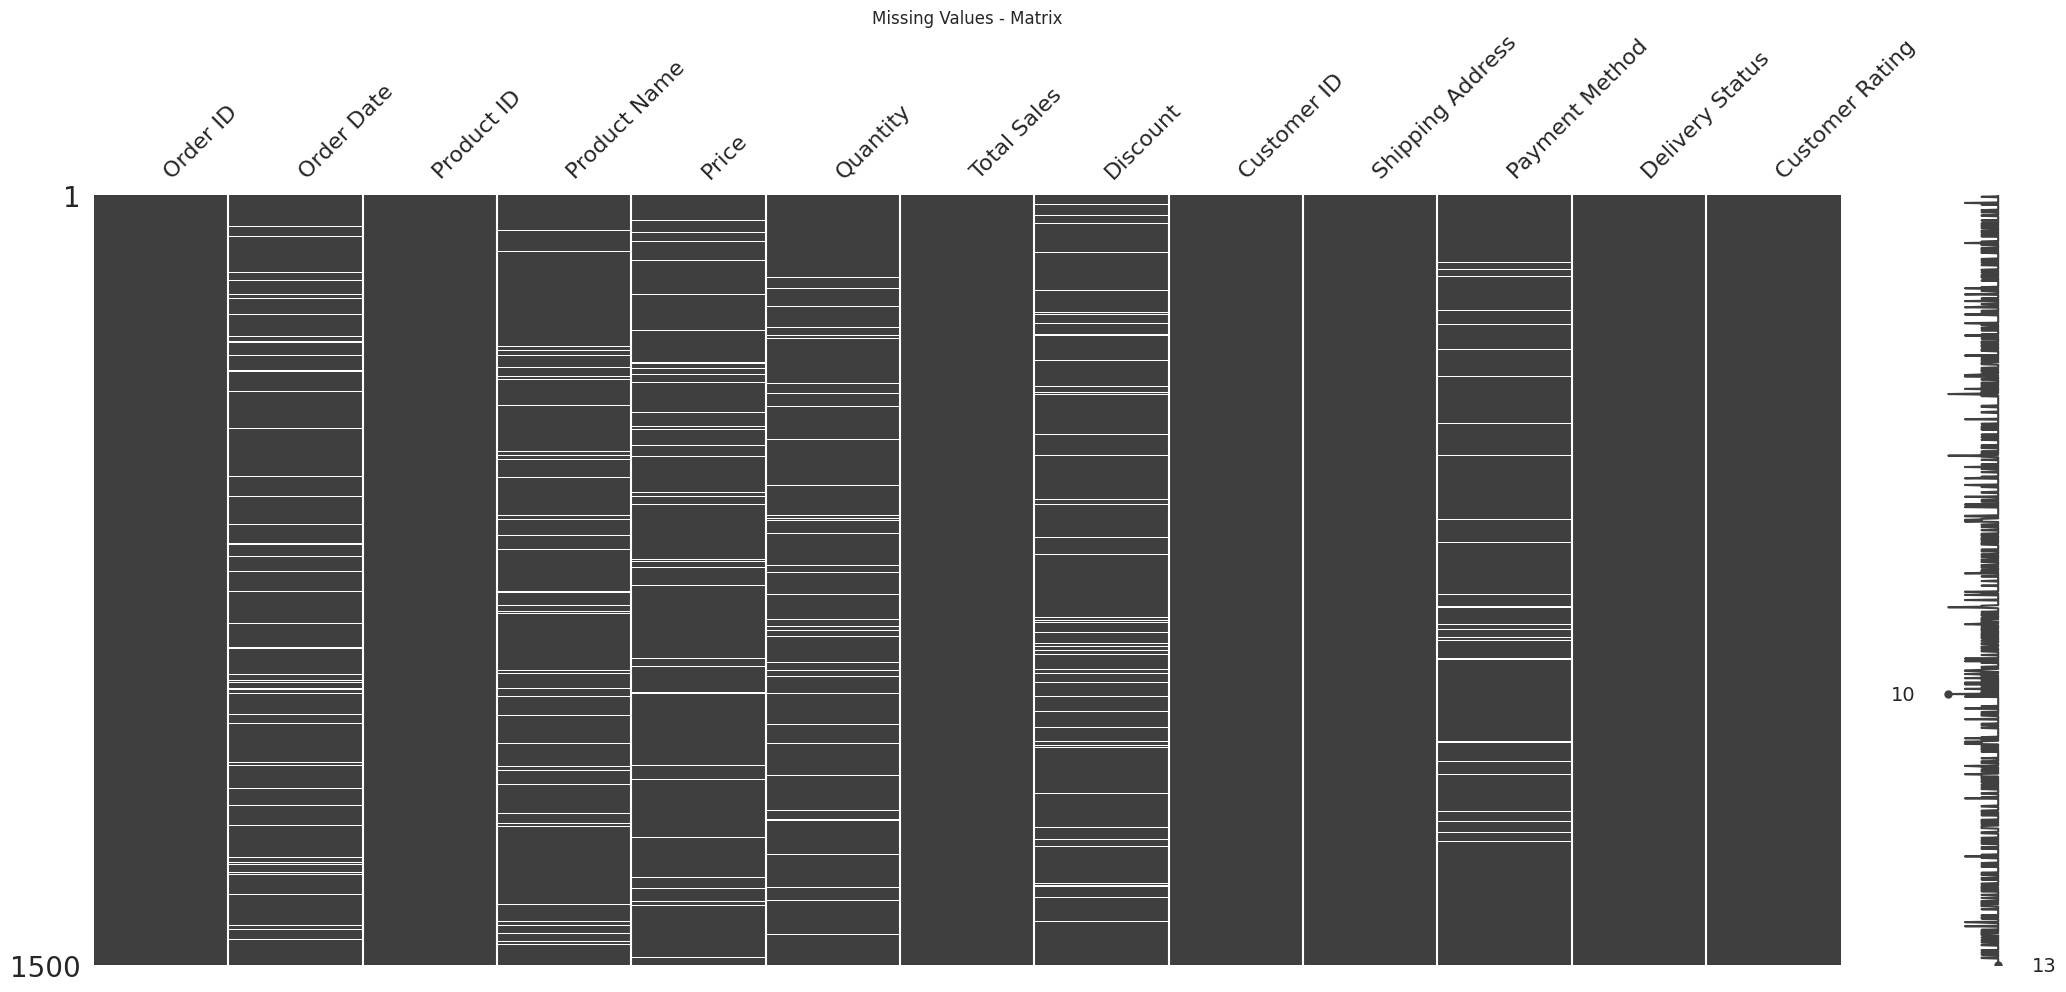

In [ ]:
msno.matrix(sales_df)
plt.title("Missing Values - Matrix")
plt.show()

In [ ]:
sales_df['Order Date'] = sales_df['Order Date'].fillna(method='ffill')

In [ ]:
product_name_mode = sales_df['Product Name'].mode().iloc[0]
sales_df['Product Name'] = sales_df['Product Name'].fillna(product_name_mode)

In [ ]:
price_mean = sales_df['Price'].mean()
sales_df['Price'] = sales_df['Price'].fillna(price_mean)

In [ ]:
quantity_mode = sales_df['Quantity'].mode().iloc[0]
sales_df['Quantity'] = sales_df['Quantity'].fillna(quantity_mode)

In [ ]:
discount_median = sales_df['Discount'].median()
sales_df['Discount'] = sales_df['Discount'].fillna(discount_median)

In [ ]:
payment_method_mode = sales_df['Payment Method'].mode().iloc[0]
sales_df['Payment Method'] = sales_df['Payment Method'].fillna(payment_method_mode)

In [ ]:
null_counts = sales_df.isnull().sum()

print("\nCount of null values for each column:")
print(null_counts)


Count of null values for each column:
Order ID            0
Order Date          0
Product ID          0
Product Name        0
Price               0
Quantity            0
Total Sales         0
Discount            0
Customer ID         0
Shipping Address    0
Payment Method      0
Delivery Status     0
Customer Rating     0
dtype: int64


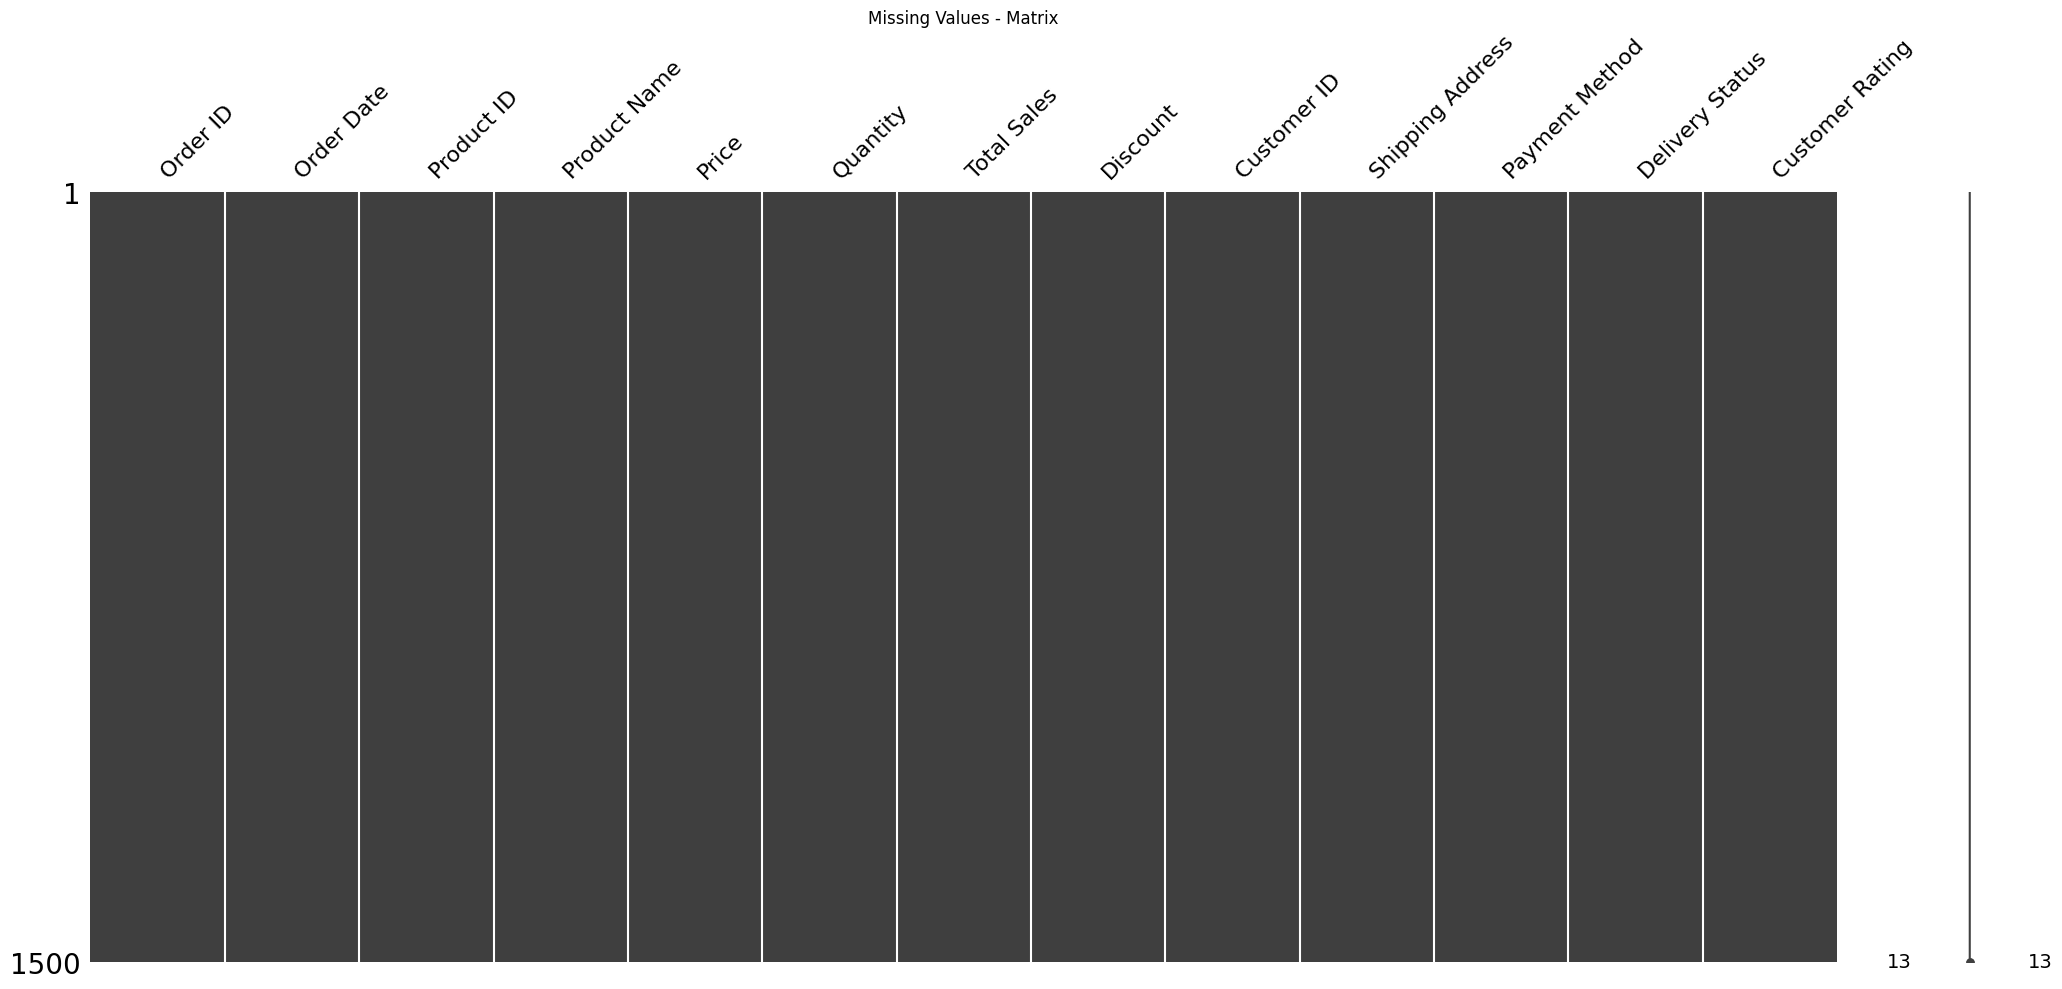

In [ ]:
msno.matrix(sales_df)
plt.title("Missing Values - Matrix")
plt.show()

In [ ]:
sales_df

,Order ID,Order Date,Product ID,Product Name,Price,Quantity,Total Sales,Discount,Customer ID,Shipping Address,Payment Method,Delivery Status,Customer Rating
0,ORD4392,2022-11-27 00:00:00,PROD3954,Monitor,83794.789276,7.0,586564,7.869280,CUST7859,"6611 Kathleen Vista\nNew Trevorville, PA 90839",PayPal,0,4
1,ORD3303,2022-05-03 00:00:00,PROD3779,Monitor,52881.038251,7.0,370167,0.557919,CUST4586,Unit 5743 Box 5125\nDPO AA 39129,Cash On Delivery,0,4
2,ORD8985,2022-01-26 00:00:00,PROD1098,Pendrive,19816.593802,5.0,99083,27.774141,CUST4561,"534 Michael Light Suite 908\nWest Jessicatown,...",Credit Card,1,2
3,ORD3064,2022-09-14 00:00:00,PROD3494,Camera,38789.473624,1.0,38789,3.234149,CUST8217,"3133 Phillips Fort Apt. 256\nJohntown, OR 04139",Cash On Delivery,0,3
4,ORD9499,2022-05-21 00:00:00,PROD4999,Dresses,41759.827723,3.0,125279,35.961152,CUST2254,690 Rodriguez Springs Apt. 528\nSouth Kevinbur...,PayPal,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,ORD8867,2022-07-14 00:00:00,PROD2728,Grinder,16644.325069,5.0,83222,49.292606,CUST7006,"4509 Leslie Island Suite 999\nSarahchester, IL...",Cash On Delivery,0,4
1496,ORD9950,2022-08-06 00:00:00,PROD3462,Laptop,72167.527801,9.0,649508,39.860998,CUST1333,"3569 White Glen\nGinahaven, MI 91783",Credit Card,1,3
1497,ORD2664,2022-08-04 00:00:00,PROD1219,Washing Meachine,70958.396102,3.0,212875,41.536842,CUST3660,"95347 Andrew Ramp Suite 511\nKimberlyfort, MH ...",Bank Transfer,0,0
1498,ORD4784,2022-07-23 00:00:00,PROD1715,Tablet,88452.696827,7.0,619169,1.612805,CUST1255,"0013 David Crossing\nStewarthaven, PR 21470",PayPal,1,2


In [ ]:
csv_file_path = 'sales_data_updated.csv'
sales_df.to_csv(csv_file_path, index=False)
print(f"DataFrame has been successfully converted to CSV: {csv_file_path}")

DataFrame has been successfully converted to CSV: sales_data_updated.csv


#**Outliear detection using Boxplot**

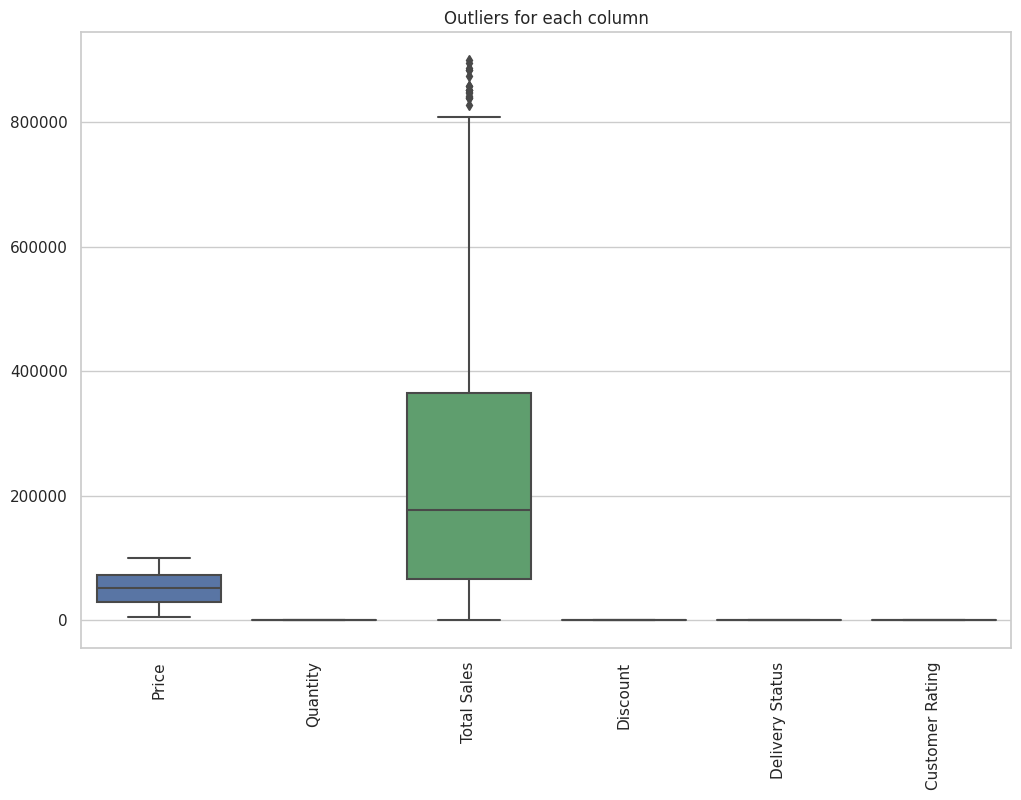

In [ ]:
plt.figure(figsize=(12, 8))
plt.xticks(rotation='vertical')
sns.boxplot(data=sales_df)
plt.title('Outliers for each column')
plt.show()

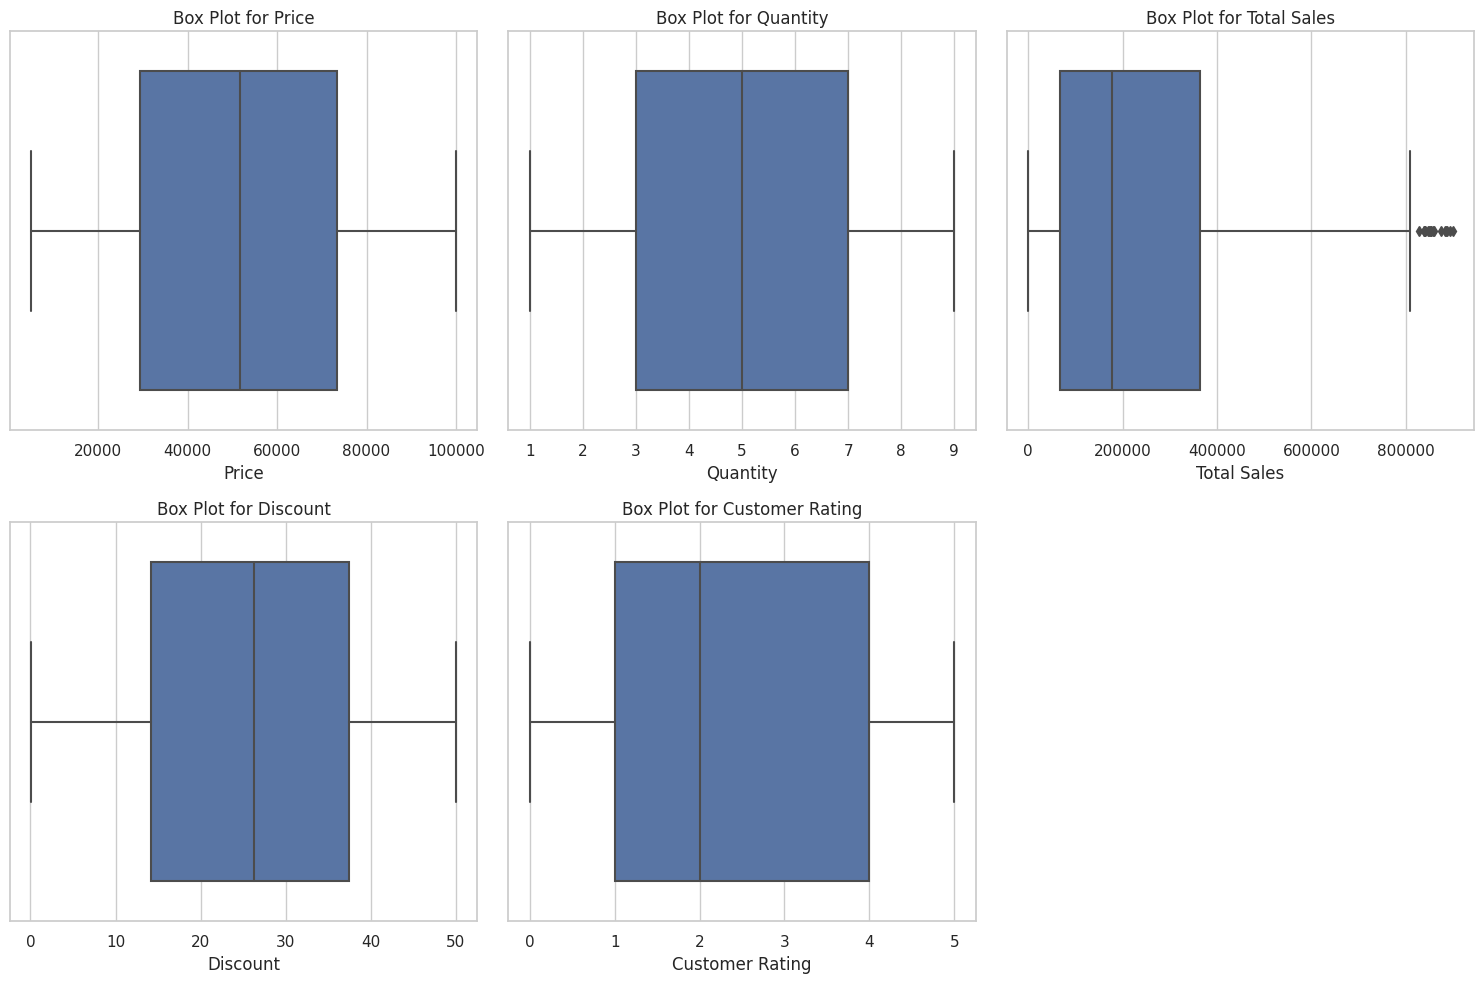

In [ ]:
# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Box plot for 'Price'
plt.subplot(2, 3, 1)
sns.boxplot(x=sales_df['Price'])
plt.title('Box Plot for Price')

# Box plot for 'Quantity'
plt.subplot(2, 3, 2)
sns.boxplot(x=sales_df['Quantity'])
plt.title('Box Plot for Quantity')

# Box plot for 'Total Sales'
plt.subplot(2, 3, 3)
sns.boxplot(x=sales_df['Total Sales'])
plt.title('Box Plot for Total Sales')

# Box plot for 'Discount'
plt.subplot(2, 3, 4)
sns.boxplot(x=sales_df['Discount'])
plt.title('Box Plot for Discount')

# Box plot for 'Customer Rating'
plt.subplot(2, 3, 5)
sns.boxplot(x=sales_df['Customer Rating'])
plt.title('Box Plot for Customer Rating')

plt.tight_layout()
plt.show()

#**Removing of outliers using Box plot**

In [ ]:
from scipy.stats import zscore

# Assuming 'Price', 'Quantity', 'Total Sales', 'Discount', 'Customer Rating' are numeric columns
numeric_columns = ['Price', 'Quantity', 'Total Sales', 'Discount', 'Customer Rating']

# Select only the numeric columns
numeric_df = sales_df[numeric_columns]

# Apply Z-score normalization
z_scores = zscore(numeric_df)
abs_z_scores = np.abs(z_scores)
threshold = 2

# Remove rows where any feature has a Z-score greater than the threshold
df_no_outliers = sales_df[(abs_z_scores < threshold).all(axis=1)]

# Display the DataFrame without outliers
print(df_no_outliers)

     Order ID           Order Date Product ID      Product Name         Price  \
0     ORD4392  2022-11-27 00:00:00   PROD3954           Monitor  83794.789276   
1     ORD3303  2022-05-03 00:00:00   PROD3779           Monitor  52881.038251   
2     ORD8985  2022-01-26 00:00:00   PROD1098          Pendrive  19816.593802   
3     ORD3064  2022-09-14 00:00:00   PROD3494            Camera  38789.473624   
4     ORD9499  2022-05-21 00:00:00   PROD4999           Dresses  41759.827723   
...       ...                  ...        ...               ...           ...   
1495  ORD8867  2022-07-14 00:00:00   PROD2728           Grinder  16644.325069   
1496  ORD9950  2022-08-06 00:00:00   PROD3462            Laptop  72167.527801   
1497  ORD2664  2022-08-04 00:00:00   PROD1219  Washing Meachine  70958.396102   
1498  ORD4784  2022-07-23 00:00:00   PROD1715            Tablet  88452.696827   
1499  ORD5759  2022-12-27 00:00:00   PROD2736          Pendrive  56678.123853   

      Quantity  Total Sales

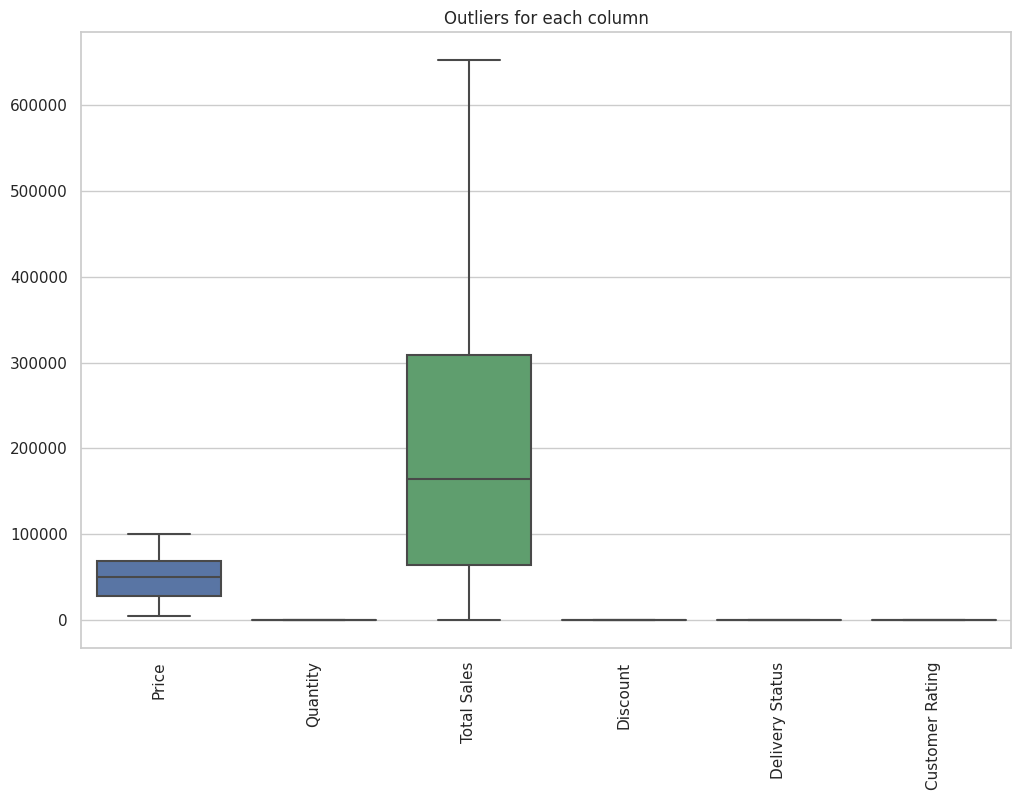

In [ ]:
plt.figure(figsize=(12, 8))
plt.xticks(rotation='vertical')
sns.boxplot(data=df_no_outliers)
plt.title('Outliers for each column')
plt.show()

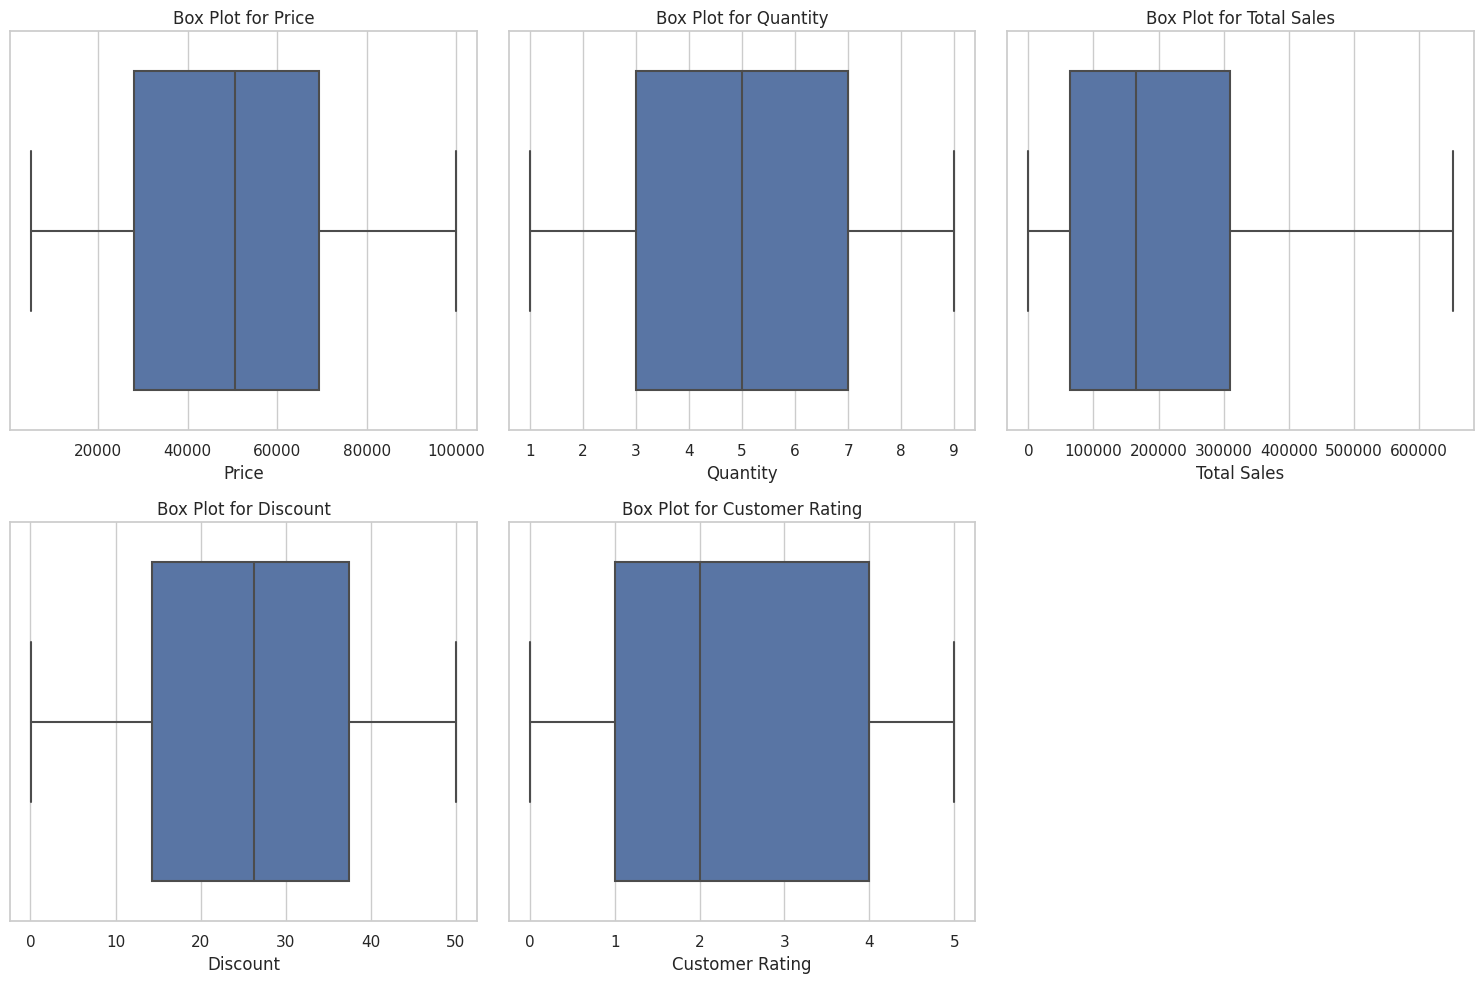

In [ ]:
# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Box plot for 'Price'
plt.subplot(2, 3, 1)
sns.boxplot(x=df_no_outliers['Price'])
plt.title('Box Plot for Price')

# Box plot for 'Quantity'
plt.subplot(2, 3, 2)
sns.boxplot(x=df_no_outliers['Quantity'])
plt.title('Box Plot for Quantity')

# Box plot for 'Total Sales'
plt.subplot(2, 3, 3)
sns.boxplot(x=df_no_outliers['Total Sales'])
plt.title('Box Plot for Total Sales')

# Box plot for 'Discount'
plt.subplot(2, 3, 4)
sns.boxplot(x=df_no_outliers['Discount'])
plt.title('Box Plot for Discount')

# Box plot for 'Customer Rating'
plt.subplot(2, 3, 5)
sns.boxplot(x=df_no_outliers['Customer Rating'])
plt.title('Box Plot for Customer Rating')

plt.tight_layout()
plt.show()

#**Exploratory Data Analysis (EDA) Data visualization**

#**Histogram**

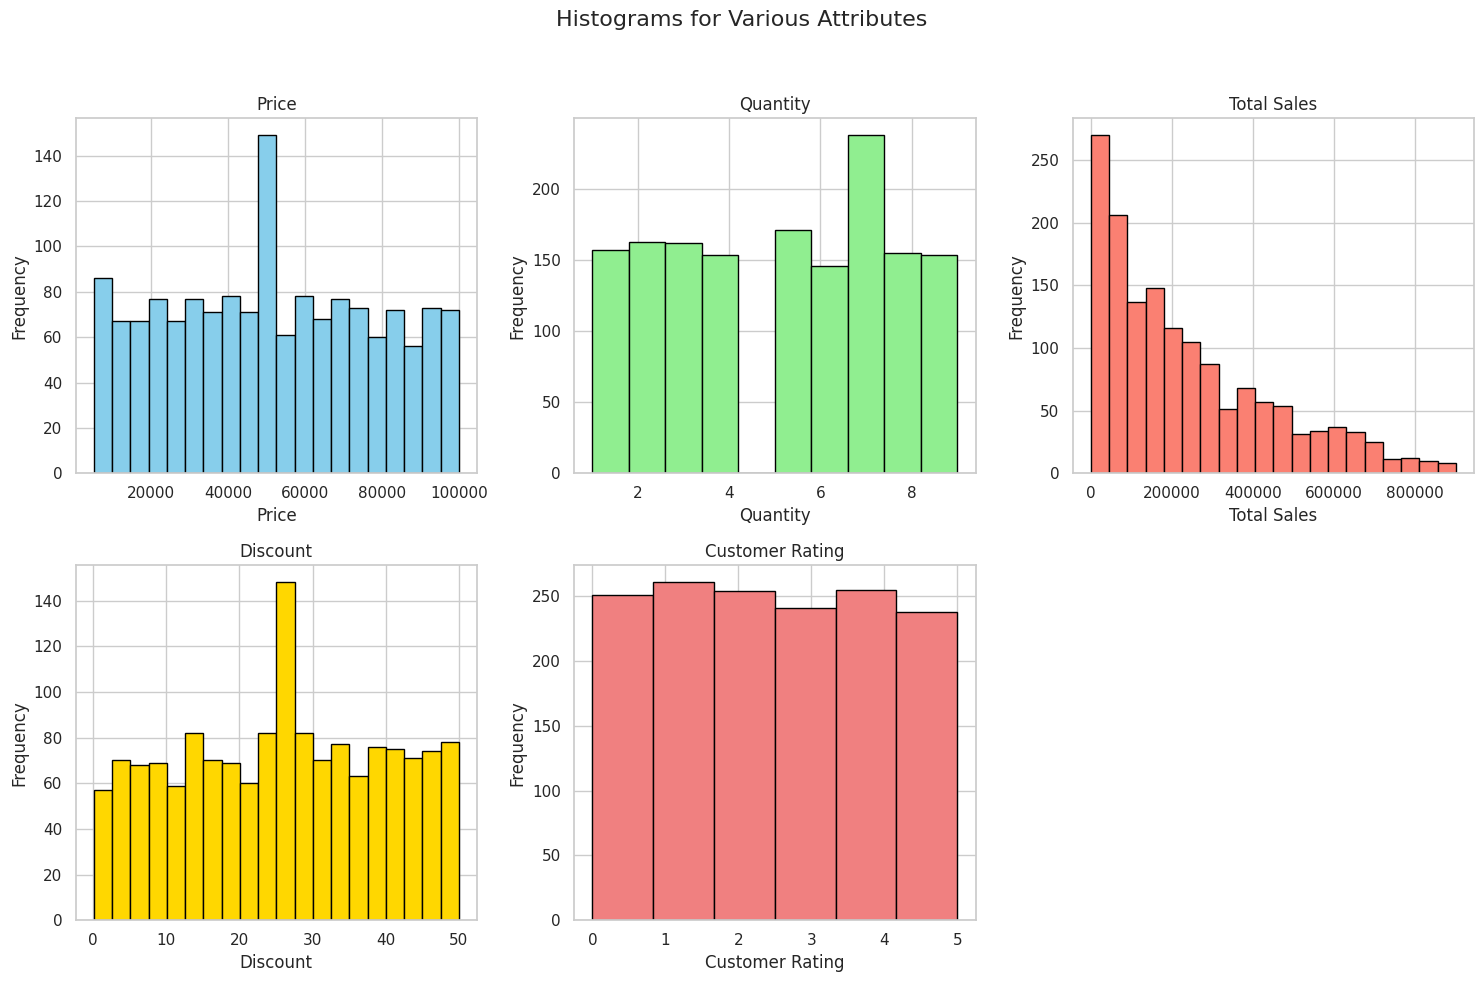

In [ ]:
import matplotlib.pyplot as plt

# Draw histograms for 'Price', 'Quantity', 'Total Sales', 'Discount', 'Customer Rating'
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
fig.suptitle('Histograms for Various Attributes', fontsize=16)

# Histogram for 'Price'
axes[0, 0].hist(sales_df['Price'], bins=20, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Price')
axes[0, 0].set_xlabel('Price')
axes[0, 0].set_ylabel('Frequency')

# Histogram for 'Quantity'
axes[0, 1].hist(sales_df['Quantity'], bins=10, color='lightgreen', edgecolor='black')
axes[0, 1].set_title('Quantity')
axes[0, 1].set_xlabel('Quantity')
axes[0, 1].set_ylabel('Frequency')

# Histogram for 'Total Sales'
axes[0, 2].hist(sales_df['Total Sales'], bins=20, color='salmon', edgecolor='black')
axes[0, 2].set_title('Total Sales')
axes[0, 2].set_xlabel('Total Sales')
axes[0, 2].set_ylabel('Frequency')

# Histogram for 'Discount'
axes[1, 0].hist(sales_df['Discount'], bins=20, color='gold', edgecolor='black')
axes[1, 0].set_title('Discount')
axes[1, 0].set_xlabel('Discount')
axes[1, 0].set_ylabel('Frequency')

# Histogram for 'Customer Rating'
axes[1, 1].hist(sales_df['Customer Rating'], bins=6, color='lightcoral', edgecolor='black')
axes[1, 1].set_title('Customer Rating')
axes[1, 1].set_xlabel('Customer Rating')
axes[1, 1].set_ylabel('Frequency')

# Remove the extra subplot
fig.delaxes(axes[1, 2])

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

#**Pie Chart**

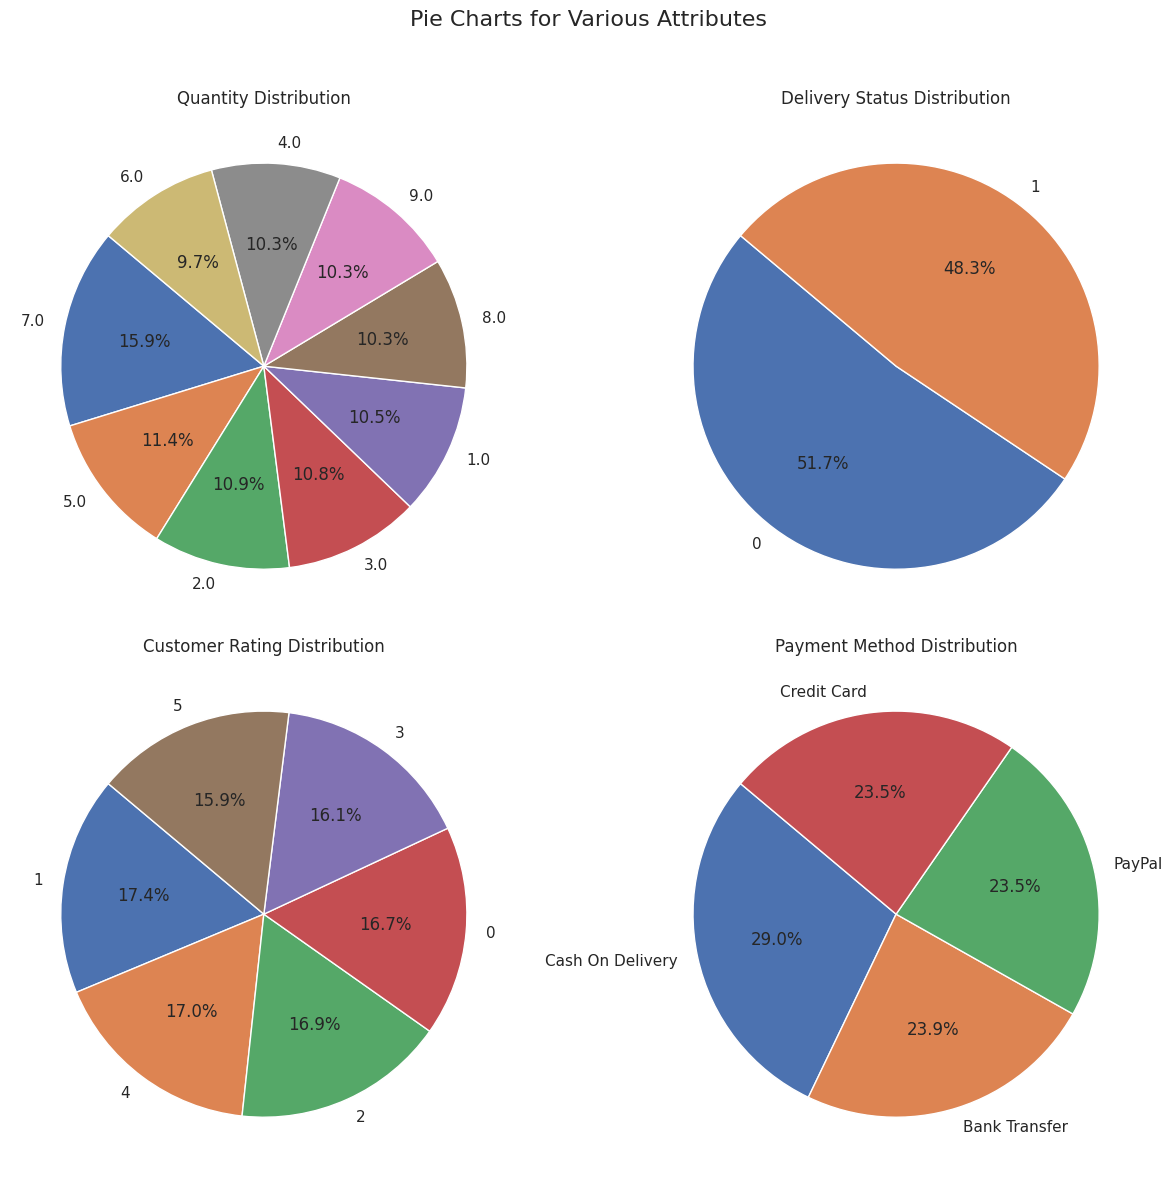

In [ ]:
import matplotlib.pyplot as plt

# Draw pie charts for 'Quantity', 'Delivery Status', 'Customer Rating', and 'Payment Method'
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))
fig.suptitle('Pie Charts for Various Attributes', fontsize=16)

# Pie chart for 'Quantity'
quantity_counts = sales_df['Quantity'].value_counts()
axes[0, 0].pie(quantity_counts, labels=quantity_counts.index, autopct='%1.1f%%', startangle=140)
axes[0, 0].set_title('Quantity Distribution')

# Pie chart for 'Delivery Status'
delivery_status_counts = sales_df['Delivery Status'].value_counts()
axes[0, 1].pie(delivery_status_counts, labels=delivery_status_counts.index, autopct='%1.1f%%', startangle=140)
axes[0, 1].set_title('Delivery Status Distribution')

# Pie chart for 'Customer Rating'
customer_rating_counts = sales_df['Customer Rating'].value_counts()
axes[1, 0].pie(customer_rating_counts, labels=customer_rating_counts.index, autopct='%1.1f%%', startangle=140)
axes[1, 0].set_title('Customer Rating Distribution')

# Pie chart for 'Payment Method'
payment_method_counts = sales_df['Payment Method'].value_counts()
axes[1, 1].pie(payment_method_counts, labels=payment_method_counts.index, autopct='%1.1f%%', startangle=140)
axes[1, 1].set_title('Payment Method Distribution')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

#**Scatter plot**

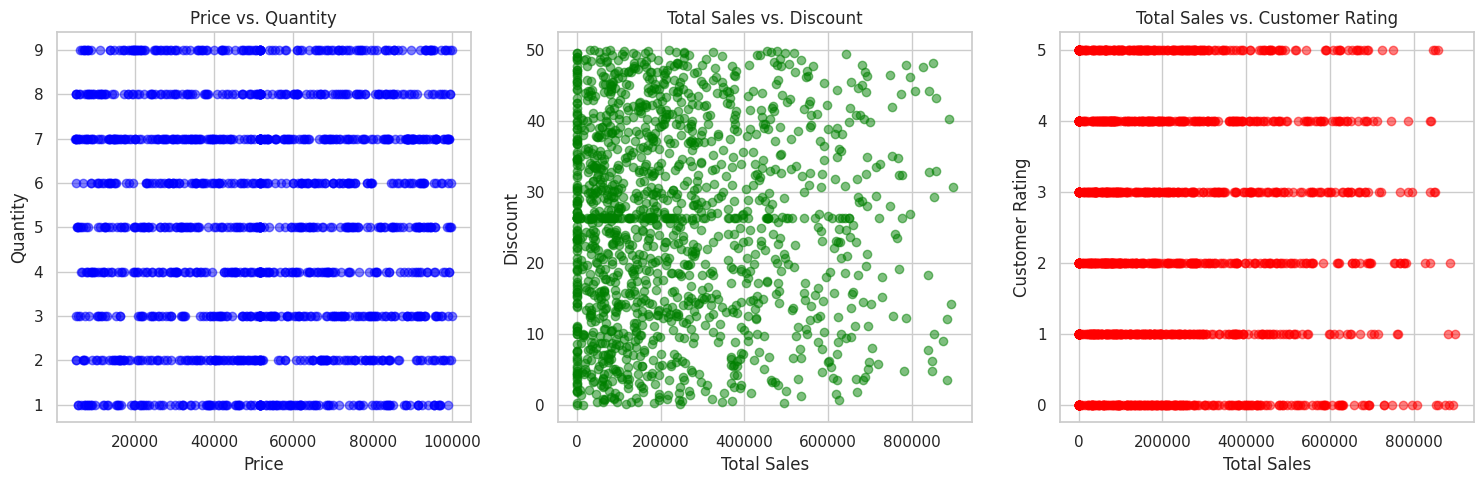

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot for 'Price' vs. 'Quantity'
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.scatter(sales_df['Price'], sales_df['Quantity'], color='blue', alpha=0.5)
plt.title('Price vs. Quantity')
plt.xlabel('Price')
plt.ylabel('Quantity')

# Scatter plot for 'Total Sales' vs. 'Discount'
plt.subplot(1, 3, 2)
plt.scatter(sales_df['Total Sales'], sales_df['Discount'], color='green', alpha=0.5)
plt.title('Total Sales vs. Discount')
plt.xlabel('Total Sales')
plt.ylabel('Discount')

# Scatter plot for 'Total Sales' vs. 'Customer Rating'
plt.subplot(1, 3, 3)
plt.scatter(sales_df['Total Sales'], sales_df['Customer Rating'], color='red', alpha=0.5)
plt.title('Total Sales vs. Customer Rating')
plt.xlabel('Total Sales')
plt.ylabel('Customer Rating')

plt.tight_layout()
plt.show()

#**Strip plot**

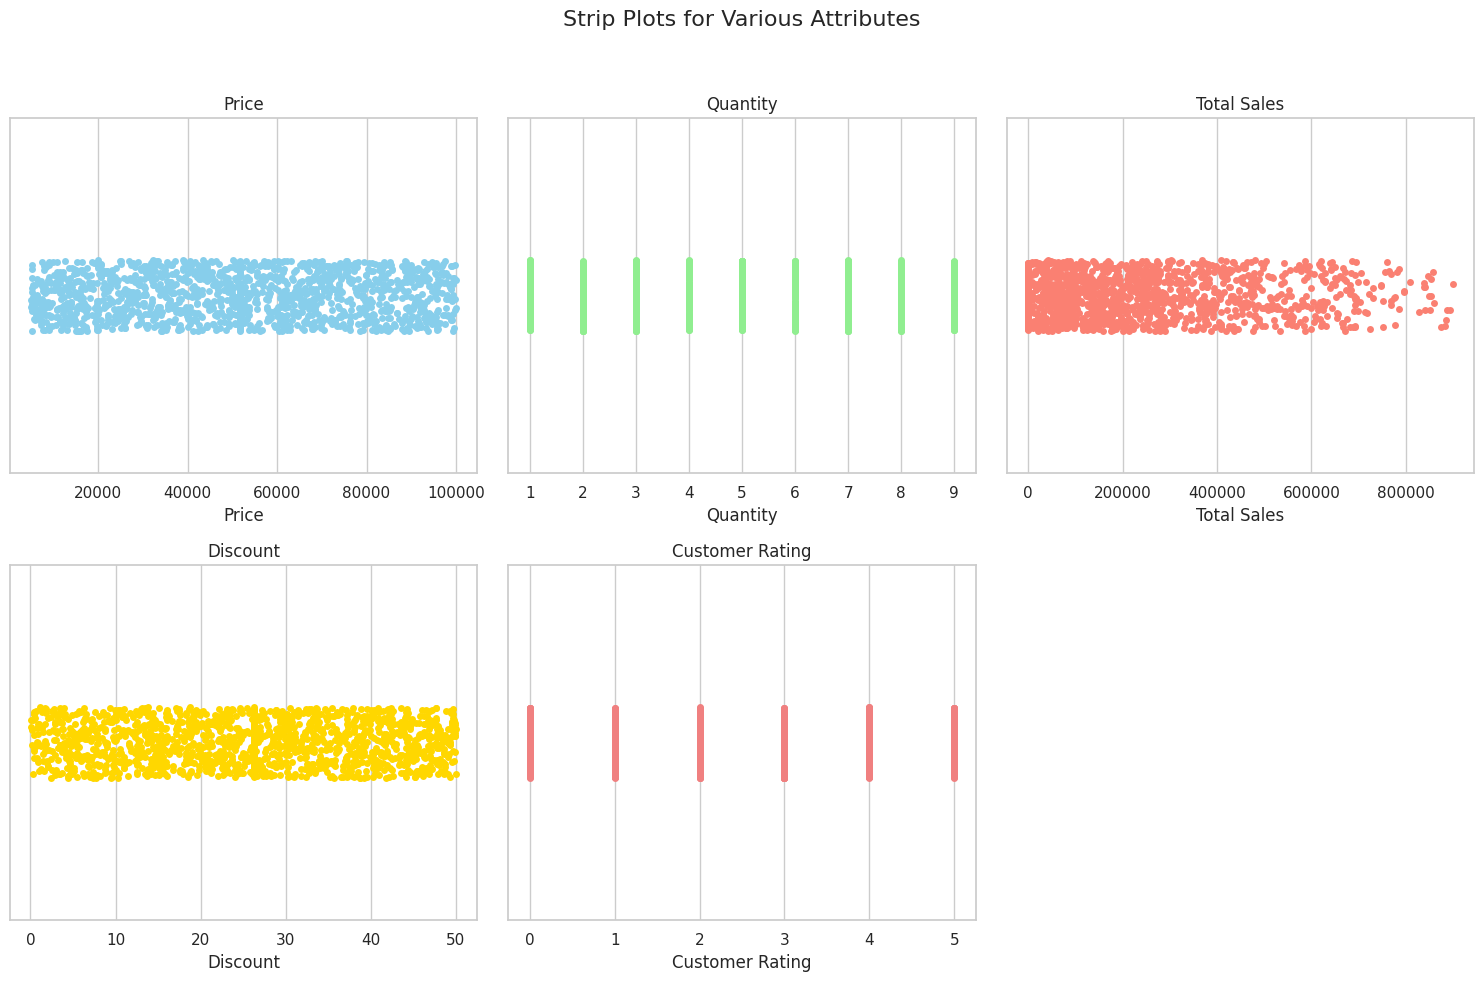

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of seaborn
sns.set(style="whitegrid")

# Create subplots for strip plots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
fig.suptitle('Strip Plots for Various Attributes', fontsize=16)

# Strip Plot for 'Price'
sns.stripplot(x=sales_df['Price'], ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Price')

# Strip Plot for 'Quantity'
sns.stripplot(x=sales_df['Quantity'], ax=axes[0, 1], color='lightgreen')
axes[0, 1].set_title('Quantity')

# Strip Plot for 'Total Sales'
sns.stripplot(x=sales_df['Total Sales'], ax=axes[0, 2], color='salmon')
axes[0, 2].set_title('Total Sales')

# Strip Plot for 'Discount'
sns.stripplot(x=sales_df['Discount'], ax=axes[1, 0], color='gold')
axes[1, 0].set_title('Discount')

# Strip Plot for 'Customer Rating'
sns.stripplot(x=sales_df['Customer Rating'], ax=axes[1, 1], color='lightcoral')
axes[1, 1].set_title('Customer Rating')

# Remove empty subplot
fig.delaxes(axes[1, 2])

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

#**Violion plot**

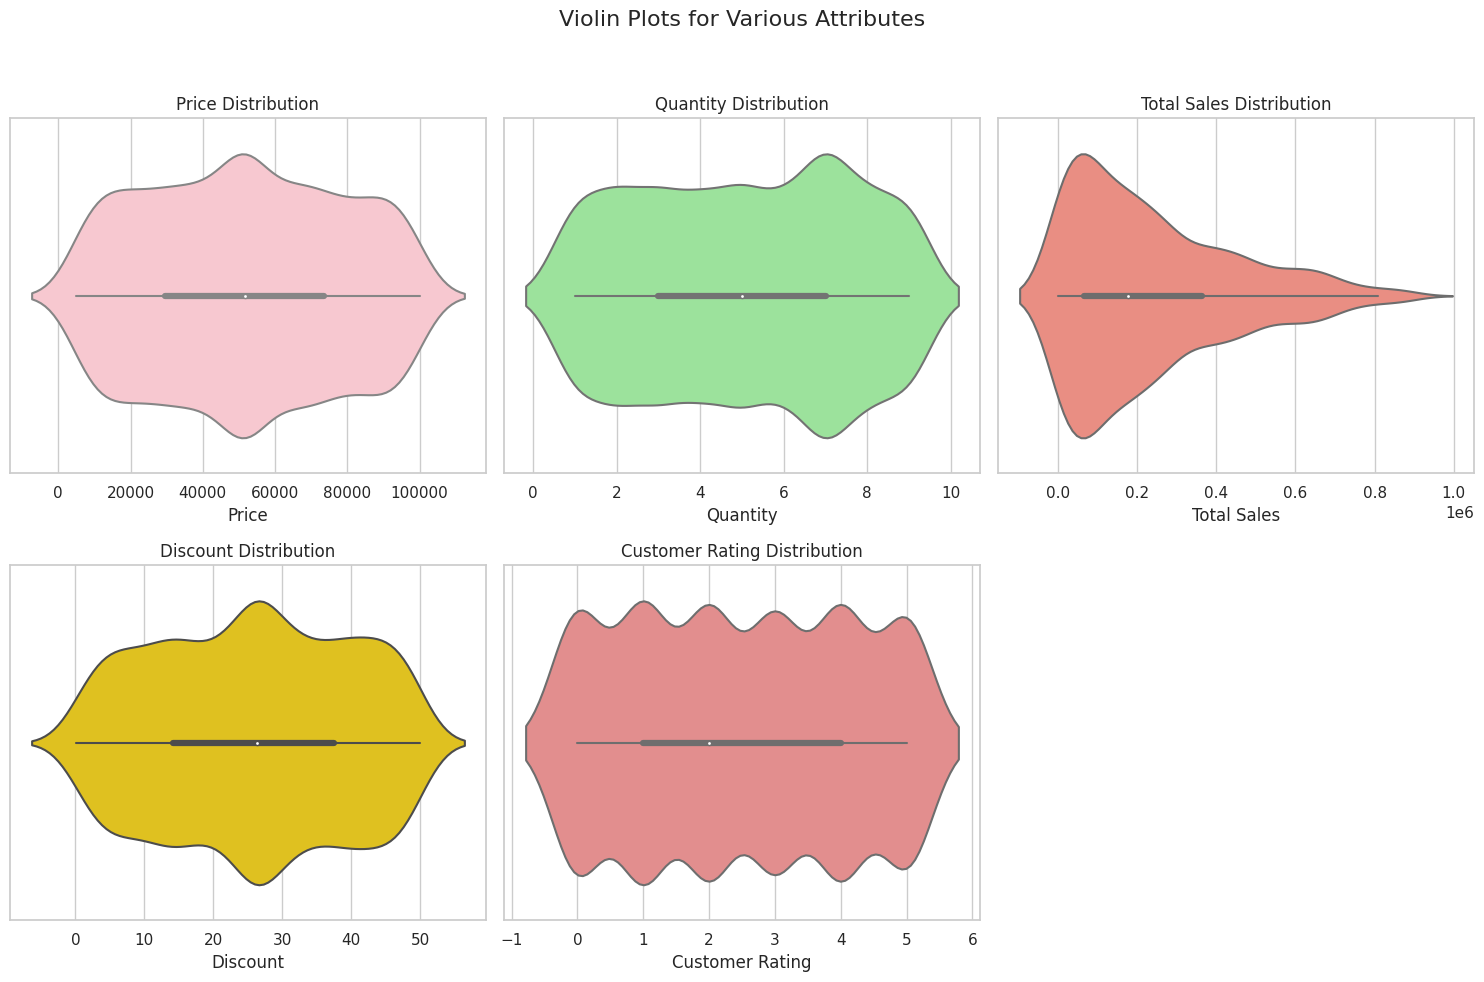

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of seaborn
sns.set(style="whitegrid")

# Create subplots for violin plots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
fig.suptitle('Violin Plots for Various Attributes', fontsize=16)

# Violin plot for 'Price'
sns.violinplot(x=sales_df['Price'], color='pink', ax=axes[0, 0])
axes[0, 0].set_title('Price Distribution')
axes[0, 0].set_xlabel('Price')

# Violin plot for 'Quantity'
sns.violinplot(x=sales_df['Quantity'], color='lightgreen', ax=axes[0, 1])
axes[0, 1].set_title('Quantity Distribution')
axes[0, 1].set_xlabel('Quantity')

# Violin plot for 'Total Sales'
sns.violinplot(x=sales_df['Total Sales'], color='salmon', ax=axes[0, 2])
axes[0, 2].set_title('Total Sales Distribution')
axes[0, 2].set_xlabel('Total Sales')

# Violin plot for 'Discount'
sns.violinplot(x=sales_df['Discount'], color='gold', ax=axes[1, 0])
axes[1, 0].set_title('Discount Distribution')
axes[1, 0].set_xlabel('Discount')

# Violin plot for 'Customer Rating'
sns.violinplot(x=sales_df['Customer Rating'], color='lightcoral', ax=axes[1, 1])
axes[1, 1].set_title('Customer Rating Distribution')
axes[1, 1].set_xlabel('Customer Rating')

# Remove empty subplot
fig.delaxes(axes[1, 2])

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

#**Swarm plot**

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 5.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 5.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 76.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 5.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 76.6% of the points cannot be placed;

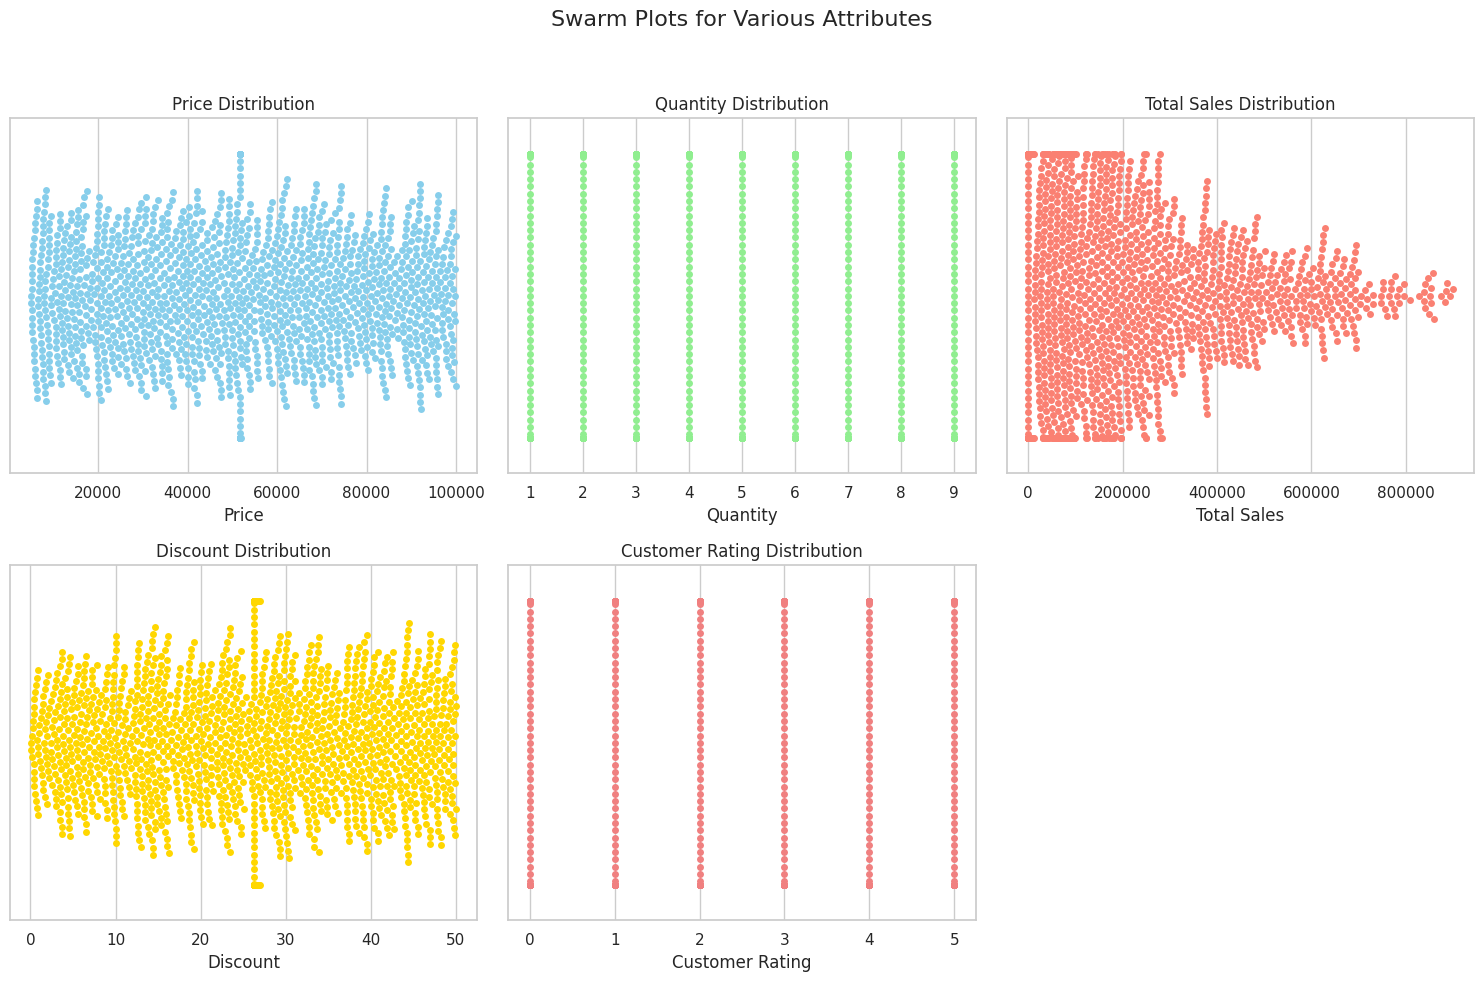

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of seaborn
sns.set(style="whitegrid")

# Create subplots for swarm plots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
fig.suptitle('Swarm Plots for Various Attributes', fontsize=16)

# Swarm plot for 'Price'
sns.swarmplot(x=sales_df['Price'], color='skyblue', ax=axes[0, 0])
axes[0, 0].set_title('Price Distribution')
axes[0, 0].set_xlabel('Price')

# Swarm plot for 'Quantity'
sns.swarmplot(x=sales_df['Quantity'], color='lightgreen', ax=axes[0, 1])
axes[0, 1].set_title('Quantity Distribution')
axes[0, 1].set_xlabel('Quantity')

# Swarm plot for 'Total Sales'
sns.swarmplot(x=sales_df['Total Sales'], color='salmon', ax=axes[0, 2])
axes[0, 2].set_title('Total Sales Distribution')
axes[0, 2].set_xlabel('Total Sales')

# Swarm plot for 'Discount'
sns.swarmplot(x=sales_df['Discount'], color='gold', ax=axes[1, 0])
axes[1, 0].set_title('Discount Distribution')
axes[1, 0].set_xlabel('Discount')

# Swarm plot for 'Customer Rating'
sns.swarmplot(x=sales_df['Customer Rating'], color='lightcoral', ax=axes[1, 1])
axes[1, 1].set_title('Customer Rating Distribution')
axes[1, 1].set_xlabel('Customer Rating')

# Remove empty subplot
fig.delaxes(axes[1, 2])

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

#**Bar plot**

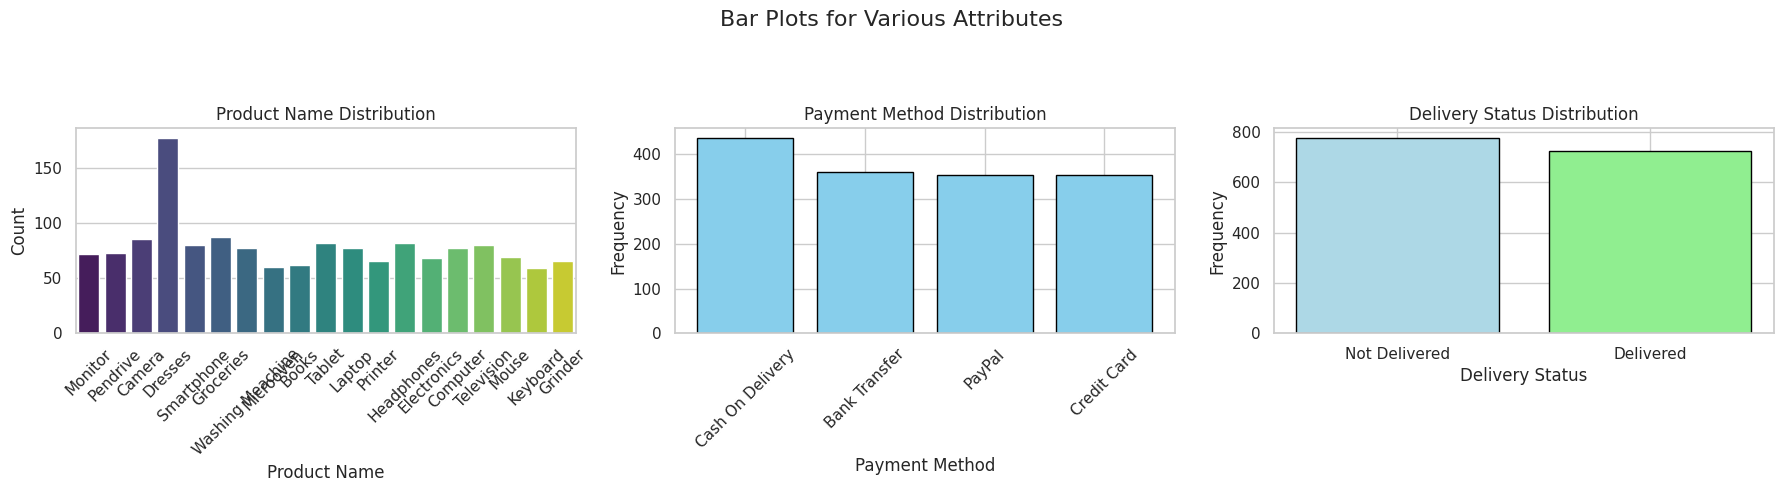

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style="whitegrid")

# Draw subplots for 'Product Name', 'Payment Method', and 'Delivery Status'
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))
fig.suptitle('Bar Plots for Various Attributes', fontsize=16)

# Bar plot for 'Product Name'
sns.countplot(x=sales_df['Product Name'], palette="viridis", ax=axes[0])
axes[0].set_title('Product Name Distribution')
axes[0].set_xlabel('Product Name')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)

# Bar plot for 'Payment Method'
payment_method_counts = sales_df['Payment Method'].value_counts()
axes[1].bar(payment_method_counts.index, payment_method_counts.values, color='skyblue', edgecolor='black')
axes[1].set_title('Payment Method Distribution')
axes[1].set_xlabel('Payment Method')
axes[1].set_ylabel('Frequency')
axes[1].tick_params(axis='x', rotation=45)

# Bar plot for 'Delivery Status'
delivery_status_counts = sales_df['Delivery Status'].value_counts()
axes[2].bar(delivery_status_counts.index, delivery_status_counts.values, color=['lightblue', 'lightgreen'], edgecolor='black')
axes[2].set_title('Delivery Status Distribution')
axes[2].set_xlabel('Delivery Status')
axes[2].set_ylabel('Frequency')
axes[2].set_xticks([0, 1])
axes[2].set_xticklabels(['Not Delivered', 'Delivered'])

plt.tight_layout(rect=[0, 0, 1, 0.9])
plt.show()

#**Stack plot**

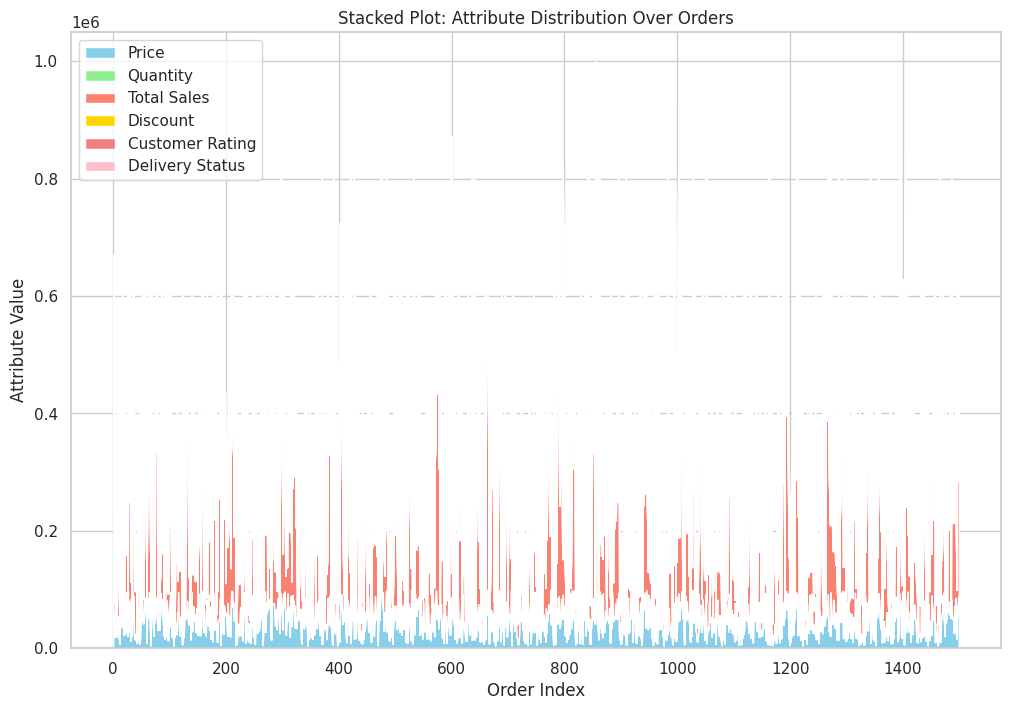

In [ ]:
import matplotlib.pyplot as plt

# Prepare data for the stacked plot
price_data = sales_df['Price'].fillna(0)
quantity_data = sales_df['Quantity'].fillna(0)
total_sales_data = sales_df['Total Sales'].fillna(0)
discount_data = sales_df['Discount'].fillna(0)
customer_rating_data = sales_df['Customer Rating'].fillna(0)
delivery_status_data = sales_df['Delivery Status'].fillna(0)

# Create a stacked plot
plt.figure(figsize=(12, 8))

plt.stackplot(sales_df.index, price_data, quantity_data, total_sales_data, discount_data, customer_rating_data, delivery_status_data,
              labels=['Price', 'Quantity', 'Total Sales', 'Discount', 'Customer Rating', 'Delivery Status'],
              colors=['skyblue', 'lightgreen', 'salmon', 'gold', 'lightcoral', 'pink'])

plt.title('Stacked Plot: Attribute Distribution Over Orders')
plt.xlabel('Order Index')
plt.ylabel('Attribute Value')
plt.legend(loc='upper left')
plt.show()

#**Stem plot**

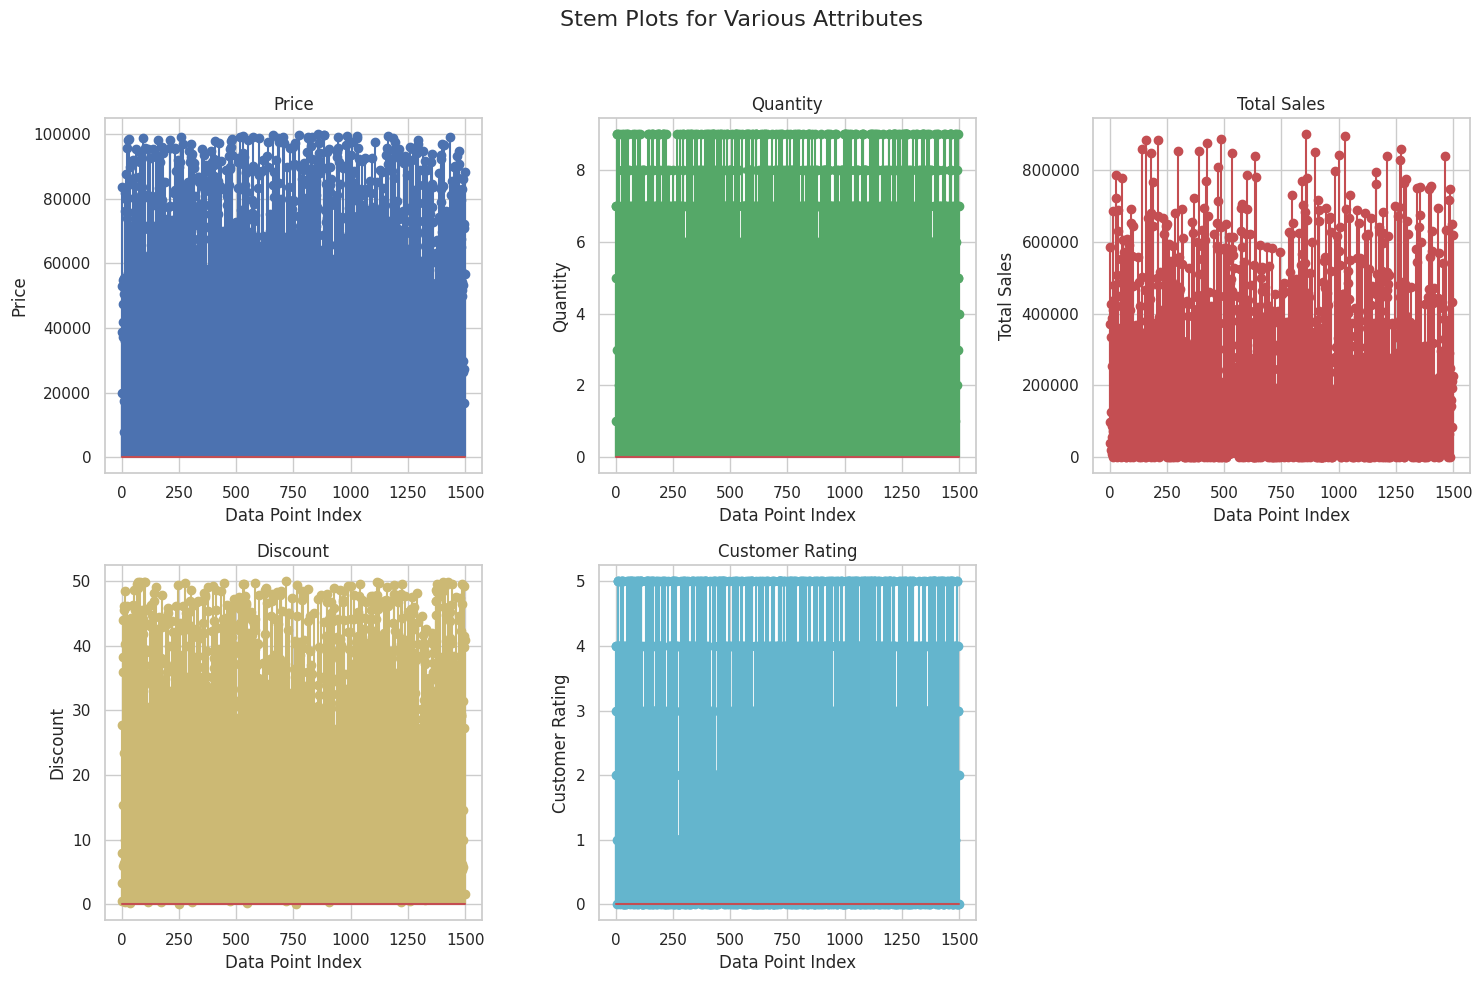

In [ ]:
import matplotlib.pyplot as plt

# Create subplots for Price, Quantity, Total Sales, Discount, and Customer Rating
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
fig.suptitle('Stem Plots for Various Attributes', fontsize=16)

# Stem plot for 'Price'
axes[0, 0].stem(sales_df['Price'], linefmt='b-', markerfmt='bo', basefmt='r-')
axes[0, 0].set_title('Price')
axes[0, 0].set_xlabel('Data Point Index')
axes[0, 0].set_ylabel('Price')

# Stem plot for 'Quantity'
axes[0, 1].stem(sales_df['Quantity'], linefmt='g-', markerfmt='go', basefmt='r-')
axes[0, 1].set_title('Quantity')
axes[0, 1].set_xlabel('Data Point Index')
axes[0, 1].set_ylabel('Quantity')

# Stem plot for 'Total Sales'
axes[0, 2].stem(sales_df['Total Sales'], linefmt='r-', markerfmt='ro', basefmt='r-')
axes[0, 2].set_title('Total Sales')
axes[0, 2].set_xlabel('Data Point Index')
axes[0, 2].set_ylabel('Total Sales')

# Stem plot for 'Discount'
axes[1, 0].stem(sales_df['Discount'], linefmt='y-', markerfmt='yo', basefmt='r-')
axes[1, 0].set_title('Discount')
axes[1, 0].set_xlabel('Data Point Index')
axes[1, 0].set_ylabel('Discount')

# Stem plot for 'Customer Rating'
axes[1, 1].stem(sales_df['Customer Rating'], linefmt='c-', markerfmt='co', basefmt='r-')
axes[1, 1].set_title('Customer Rating')
axes[1, 1].set_xlabel('Data Point Index')
axes[1, 1].set_ylabel('Customer Rating')

# Remove empty subplot
fig.delaxes(axes[1, 2])

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

#**Squarify**

In [ ]:
pip install squarify matplotlib

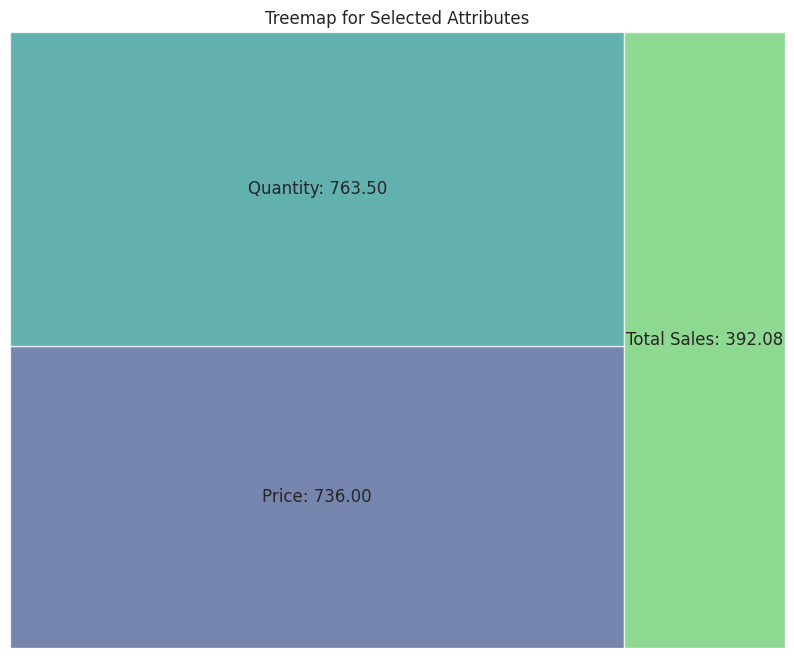

In [ ]:
import matplotlib.pyplot as plt
import squarify

# Select attributes for the treemap
selected_attributes = ['Price', 'Quantity', 'Total Sales']

# Normalize data for better visualization
normalized_data = sales_df[selected_attributes].apply(lambda x: (x - min(x)) / (max(x) - min(x)))

# Create labels for treemap
labels = [f"{attr}: {value:.2f}" for attr, value in zip(normalized_data.columns, normalized_data.sum())]

# Create treemap
plt.figure(figsize=(10, 8))
squarify.plot(sizes=normalized_data.sum(), label=labels, alpha=0.7, color=sns.color_palette("viridis", len(selected_attributes)))
plt.title('Treemap for Selected Attributes')
plt.axis('off')
plt.show()

#**Heat map**

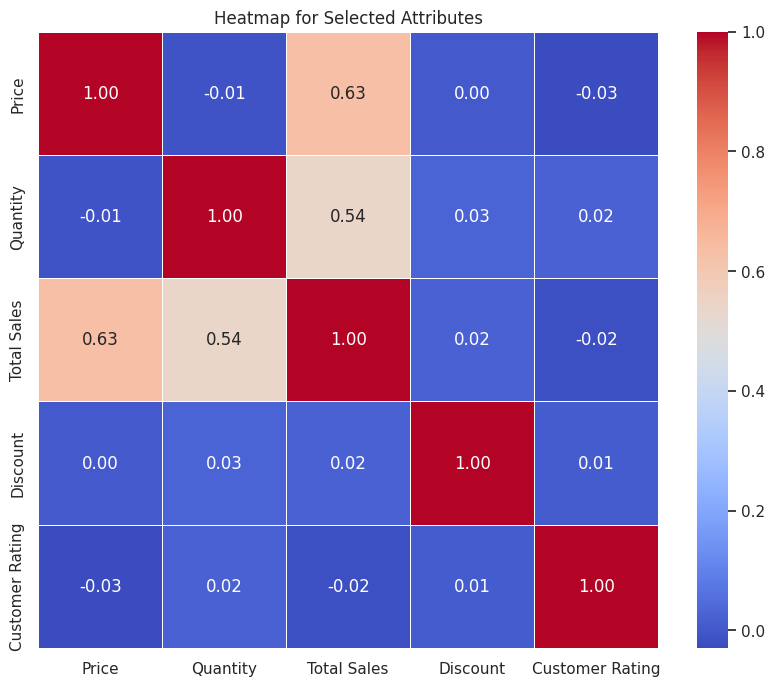

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming sales_df contains your data
# If not, replace sales_df with your DataFrame variable

attributes_to_visualize = [
    'Price', 'Quantity', 'Total Sales', 'Discount', 'Customer Rating'
]

# Select relevant columns
heatmap_data = sales_df[attributes_to_visualize]

# Calculate correlation matrix
correlation_matrix = heatmap_data.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title('Heatmap for Selected Attributes')
plt.show()

#**Pair plot**

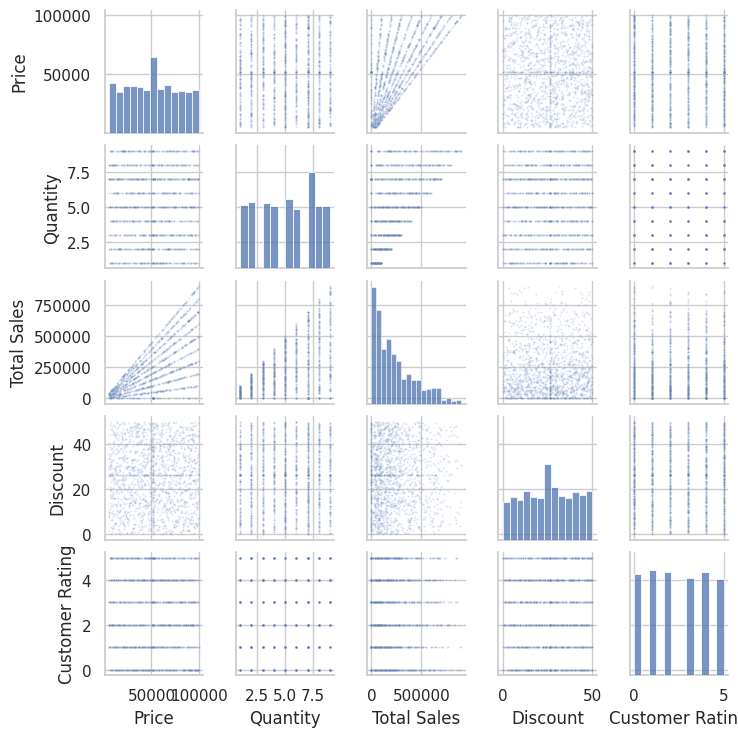

In [ ]:
attributes_to_visualize = [
    'Price', 'Quantity', 'Total Sales', 'Discount', 'Customer Rating'
]
sns.pairplot(sales_df[attributes_to_visualize], height=1.5, plot_kws={"s": 2, "alpha": 0.2})
plt.show()

#**Data Transformation**

In [ ]:
sales_df['Order Date'] = pd.to_datetime(sales_df['Order Date'])
sales_df.head()

,Order ID,Order Date,Product ID,Product Name,Price,Quantity,Total Sales,Discount,Customer ID,Shipping Address,Payment Method,Delivery Status,Customer Rating
0,ORD4392,2022-11-27,PROD3954,Monitor,83794.789276,7.0,586564,7.869280,CUST7859,"6611 Kathleen Vista\nNew Trevorville, PA 90839",PayPal,0,4
1,ORD3303,2022-05-03,PROD3779,Monitor,52881.038251,7.0,370167,0.557919,CUST4586,Unit 5743 Box 5125\nDPO AA 39129,Cash On Delivery,0,4
2,ORD8985,2022-01-26,PROD1098,Pendrive,19816.593802,5.0,99083,27.774141,CUST4561,"534 Michael Light Suite 908\nWest Jessicatown,...",Credit Card,1,2
3,ORD3064,2022-09-14,PROD3494,Camera,38789.473624,1.0,38789,3.234149,CUST8217,"3133 Phillips Fort Apt. 256\nJohntown, OR 04139",Cash On Delivery,0,3
4,ORD9499,2022-05-21,PROD4999,Dresses,41759.827723,3.0,125279,35.961152,CUST2254,690 Rodriguez Springs Apt. 528\nSouth Kevinbur...,PayPal,0,1


In [ ]:
categorical_columns = ['Product ID', 'Product Name', 'Customer ID', 'Payment Method']
sales_df[categorical_columns] = sales_df[categorical_columns].astype('category')

In [ ]:
sales_df

,Order ID,Order Date,Product ID,Product Name,Price,Quantity,Total Sales,Discount,Customer ID,Shipping Address,Payment Method,Delivery Status,Customer Rating
0,ORD4392,2022-11-27,PROD3954,Monitor,83794.789276,7.0,586564,7.869280,CUST7859,"6611 Kathleen Vista\nNew Trevorville, PA 90839",PayPal,0,4
1,ORD3303,2022-05-03,PROD3779,Monitor,52881.038251,7.0,370167,0.557919,CUST4586,Unit 5743 Box 5125\nDPO AA 39129,Cash On Delivery,0,4
2,ORD8985,2022-01-26,PROD1098,Pendrive,19816.593802,5.0,99083,27.774141,CUST4561,"534 Michael Light Suite 908\nWest Jessicatown,...",Credit Card,1,2
3,ORD3064,2022-09-14,PROD3494,Camera,38789.473624,1.0,38789,3.234149,CUST8217,"3133 Phillips Fort Apt. 256\nJohntown, OR 04139",Cash On Delivery,0,3
4,ORD9499,2022-05-21,PROD4999,Dresses,41759.827723,3.0,125279,35.961152,CUST2254,690 Rodriguez Springs Apt. 528\nSouth Kevinbur...,PayPal,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,ORD8867,2022-07-14,PROD2728,Grinder,16644.325069,5.0,83222,49.292606,CUST7006,"4509 Leslie Island Suite 999\nSarahchester, IL...",Cash On Delivery,0,4
1496,ORD9950,2022-08-06,PROD3462,Laptop,72167.527801,9.0,649508,39.860998,CUST1333,"3569 White Glen\nGinahaven, MI 91783",Credit Card,1,3
1497,ORD2664,2022-08-04,PROD1219,Washing Meachine,70958.396102,3.0,212875,41.536842,CUST3660,"95347 Andrew Ramp Suite 511\nKimberlyfort, MH ...",Bank Transfer,0,0
1498,ORD4784,2022-07-23,PROD1715,Tablet,88452.696827,7.0,619169,1.612805,CUST1255,"0013 David Crossing\nStewarthaven, PR 21470",PayPal,1,2


In [ ]:
sales_df['Delivery Status'] = sales_df['Delivery Status'].astype(bool)

In [ ]:
sales_df = sales_df.dropna()
sales_df['Discount'].fillna(sales_df['Discount'].mean(), inplace=True)

In [ ]:
sales_df = pd.get_dummies(sales_df, columns=['Payment Method'], prefix='Payment')

In [ ]:
sales_df.head()

,Order ID,Order Date,Product ID,Product Name,Price,Quantity,Total Sales,Discount,Customer ID,Shipping Address,Delivery Status,Customer Rating,Payment_Bank Transfer,Payment_Cash On Delivery,Payment_Credit Card,Payment_PayPal
0,ORD4392,2022-11-27,PROD3954,Monitor,83794.789276,7.0,586564,7.869280,CUST7859,"6611 Kathleen Vista\nNew Trevorville, PA 90839",False,4,0,0,0,1
1,ORD3303,2022-05-03,PROD3779,Monitor,52881.038251,7.0,370167,0.557919,CUST4586,Unit 5743 Box 5125\nDPO AA 39129,False,4,0,1,0,0
2,ORD8985,2022-01-26,PROD1098,Pendrive,19816.593802,5.0,99083,27.774141,CUST4561,"534 Michael Light Suite 908\nWest Jessicatown,...",True,2,0,0,1,0
3,ORD3064,2022-09-14,PROD3494,Camera,38789.473624,1.0,38789,3.234149,CUST8217,"3133 Phillips Fort Apt. 256\nJohntown, OR 04139",False,3,0,1,0,0
4,ORD9499,2022-05-21,PROD4999,Dresses,41759.827723,3.0,125279,35.961152,CUST2254,690 Rodriguez Springs Apt. 528\nSouth Kevinbur...,False,1,0,0,0,1


In [ ]:
from sklearn.preprocessing import MinMaxScaler
total_sales = sales_df['Total Sales'].values.reshape(-1, 1)
scaler = MinMaxScaler()
scaled_total_sales = scaler.fit_transform(total_sales)
sales_df['Scaled Total Sales'] = scaled_total_sales.flatten()
print(sales_df[['Total Sales', 'Scaled Total Sales']])

      Total Sales  Scaled Total Sales
0          586564            0.652060
1          370167            0.411500
2           99083            0.110147
3           38789            0.043120
4          125279            0.139268
...           ...                 ...
1495        83222            0.092515
1496       649508            0.722033
1497       212875            0.236645
1498       619169            0.688306
1499       226712            0.252027

[1500 rows x 2 columns]


#**Line plot**

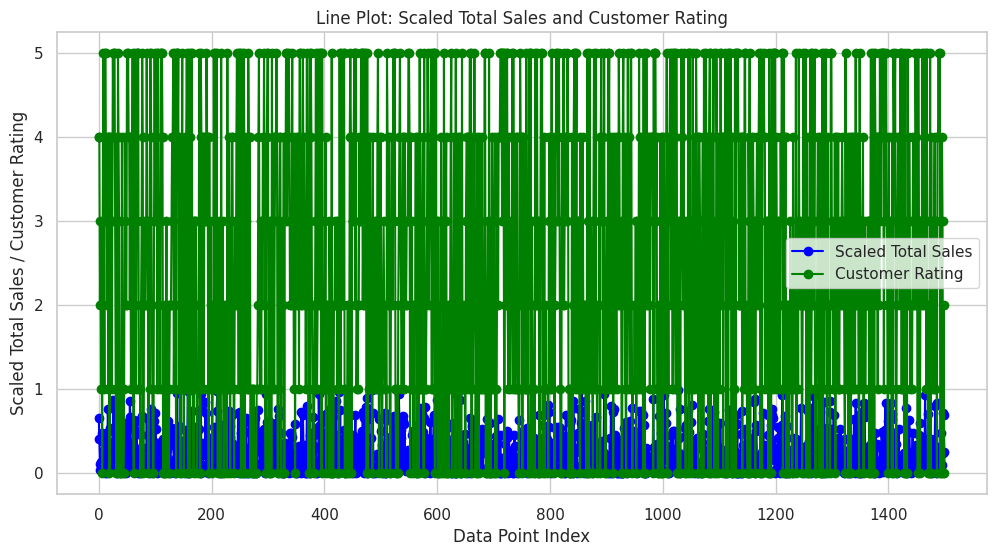

In [ ]:
import matplotlib.pyplot as plt

# Line plot for 'Total Sales' and 'Customer Rating'
plt.figure(figsize=(12, 6))
plt.plot(sales_df['Scaled Total Sales'], label='Scaled Total Sales', marker='o', linestyle='-', color='blue')
plt.plot(sales_df['Customer Rating'], label='Customer Rating', marker='o', linestyle='-', color='green')

plt.title('Line Plot: Scaled Total Sales and Customer Rating')
plt.xlabel('Data Point Index')
plt.ylabel('Scaled Total Sales / Customer Rating')
plt.legend()
plt.show()